# Find a suiting epsilon

The goal of this notebook is to derive a suitable magnitude of the attack for each feature.

In [1]:
#import uproot
import uproot4 as uproot
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
#import seaborn as sns
import mplhep as hep

In [2]:
import awkward1 as ak

In [3]:
uproot.__version__

'0.1.2'

## Checking files content

Focusing on pred_ntuple_merged_342

In [4]:
inputs_root = "/eos/cms/store/group/phys_btag/ParticleTransformer/merged/ntuple_merged_342.root:deepntuplizer/tree"

In [5]:
file_ = uproot.open(inputs_root)
columns_ = file_.keys()

In [6]:
columns_

['n_sv',
 'nsv',
 'sv_pt',
 'sv_eta',
 'sv_phi',
 'sv_e',
 'sv_etarel',
 'sv_phirel',
 'sv_deltaR',
 'sv_mass',
 'sv_ntracks',
 'sv_chi2',
 'sv_ndf',
 'sv_normchi2',
 'sv_dxy',
 'sv_dxyerr',
 'sv_dxysig',
 'sv_d3d',
 'sv_d3derr',
 'sv_d3dsig',
 'sv_costhetasvpv',
 'sv_enratio',
 'n_gtracks',
 'nGtracks',
 'gtrack_pt',
 'gtrack_eta',
 'gtrack_phi',
 'gtrack_mass',
 'gtrack_dz',
 'gtrack_dxy',
 'gtrack_3D_ip',
 'gtrack_3D_sip',
 'gtrack_2D_ip',
 'gtrack_2D_sip',
 'gtrack_dR',
 'gtrack_dist_neigh',
 'gtrack_3D_TrackProbability',
 'gtrack_2D_TrackProbability',
 'gtrack_chi2reduced',
 'gtrack_nPixelHits',
 'gtrack_nHits',
 'gtrack_jetAxisDistance',
 'gtrack_jetAxisDlength',
 'gtrack_PCAtrackFromPV',
 'gtrack_dotProdTrack',
 'gtrack_dotProdTrack2D',
 'npv',
 'rho',
 'ntrueInt',
 'event_no',
 'jet_no',
 'gen_pt',
 'Delta_gen_pt',
 'isB',
 'isGBB',
 'isBB',
 'isLeptonicB',
 'isLeptonicB_C',
 'isC',
 'isGCC',
 'isCC',
 'isUD',
 'isS',
 'isG',
 'isPU',
 'isUndefined',
 'genDecay',
 'jet_hflav',


In [7]:
global_branches = ['jet_pt',
                   'jet_eta',
                   'nCpfcand',
                   'nNpfcand',
                   'nsv',
                   'npv',
                   'TagVarCSV_trackSumJetEtRatio',
                   'TagVarCSV_trackSumJetDeltaR',
                   'TagVarCSV_vertexCategory',
                   'TagVarCSV_trackSip2dValAboveCharm',
                   'TagVarCSV_trackSip2dSigAboveCharm',
                   'TagVarCSV_trackSip3dValAboveCharm',
                   'TagVarCSV_trackSip3dSigAboveCharm',
                   'TagVarCSV_jetNSelectedTracks',
                   'TagVarCSV_jetNTracksEtaRel']
cpf_branches = ['Cpfcan_BtagPf_trackEtaRel',
                'Cpfcan_BtagPf_trackPtRel',
                'Cpfcan_BtagPf_trackPPar',
                'Cpfcan_BtagPf_trackDeltaR',
                'Cpfcan_BtagPf_trackPParRatio',
                'Cpfcan_BtagPf_trackSip2dVal',
                'Cpfcan_BtagPf_trackSip2dSig',
                'Cpfcan_BtagPf_trackSip3dVal',
                'Cpfcan_BtagPf_trackSip3dSig',
                'Cpfcan_BtagPf_trackJetDistVal',
                'Cpfcan_ptrel',
                'Cpfcan_drminsv',
                'Cpfcan_distminsv',
                'Cpfcan_VTX_ass',
                'Cpfcan_puppiw',
                'Cpfcan_chi2',
                'Cpfcan_quality']
npf_branches = ['Npfcan_ptrel',
                'Npfcan_etarel',
                'Npfcan_phirel', 
                'Npfcan_deltaR',
                'Npfcan_isGamma',
                'Npfcan_HadFrac',
                'Npfcan_drminsv',
                'Npfcan_puppiw']
vtx_branches = ['sv_pt',
                'sv_deltaR',
                'sv_mass',
                'sv_etarel',
                'sv_phirel',
                'sv_ntracks',
                'sv_chi2',
                'sv_normchi2',
                'sv_dxy',
                'sv_dxysig',
                'sv_d3d',
                'sv_d3dsig',
                'sv_costhetasvpv',
                'sv_enratio']
cpf_pts_branches = ['Cpfcan_pt',
                    'Cpfcan_eta',
                    'Cpfcan_phi',
                    'Cpfcan_e']
npf_pts_branches = ['Npfcan_pt',
                    'Npfcan_eta',
                    'Npfcan_phi',
                    'Npfcan_e']
vtx_pts_branches = ['sv_pt',
                    'sv_eta',
                    'sv_phi',
                    'sv_e']

In [8]:
df_glob = file_.arrays(global_branches, library="ak")

In [9]:
df_cpf = file_.arrays(cpf_branches, library="ak")

In [10]:
df_npf = file_.arrays(npf_branches, library="ak")

In [11]:
df_vtx = file_.arrays(vtx_branches, library="ak")

In [12]:
df_cpf_pts = file_.arrays(cpf_pts_branches, library="ak")

In [13]:
df_npf_pts = file_.arrays(npf_pts_branches, library="ak")

In [14]:
df_vtx_pts = file_.arrays(vtx_pts_branches, library="ak")

In [385]:
hflav = file_.arrays('jet_hflav', library="ak")['jet_hflav']

In [386]:
hflav

<Array [0, 0, 0, 0, 0, 0, ... 0, 0, 0, 0, 0, 4] type='400000 * int32'>

In [15]:
df_glob

<Array [{jet_pt: 24.3, ... ] type='400000 * {"jet_pt": float32, "jet_eta": float...'>

In [194]:
ak.sum(df_glob.nNpfcand == 0)

12956

In [195]:
df_glob.nNpfcand[:5]

<Array [2, 4, 2, 3, 3] type='5 * float32'>

In [309]:
df_glob.nsv[:5]

<Array [0, 0, 1, 0, 2] type='5 * float32'>

In [16]:
df_cpf

<Array [{Cpfcan_BtagPf_trackEtaRel: [, ... ] type='400000 * {"Cpfcan_BtagPf_trac...'>

In [17]:
df_npf

<Array [{Npfcan_ptrel: [-0.918, ... 0.969]}] type='400000 * {"Npfcan_ptrel": var...'>

In [200]:
ak.sum(ak.num(df_npf.Npfcan_ptrel[:]) == df_glob.nNpfcand[:])

400000

In [18]:
df_vtx

<Array [{sv_pt: [], ... sv_enratio: []}] type='400000 * {"sv_pt": var * float32,...'>

In [19]:
df_cpf_pts

<Array [{Cpfcan_pt: [1.39, 12.7, ... 3.57]}] type='400000 * {"Cpfcan_pt": var * ...'>

In [20]:
df_npf_pts

<Array [{Npfcan_pt: [1.99, 1.17, ... 2.83]}] type='400000 * {"Npfcan_pt": var * ...'>

In [21]:
df_vtx_pts

<Array [{sv_pt: [], sv_eta: [, ... sv_e: []}] type='400000 * {"sv_pt": var * flo...'>

In [22]:
df_cpf_clip = ak.pad_none(df_cpf,25,clip=True)

In [23]:
df_npf_clip = ak.pad_none(df_npf,25,clip=True)

In [24]:
df_vtx_clip = ak.pad_none(df_vtx,5,clip=True)

In [25]:
df_cpf_pts_clip = ak.pad_none(df_cpf_pts,25,clip=True)

In [26]:
df_npf_pts_clip = ak.pad_none(df_npf_pts,25,clip=True)

In [27]:
df_vtx_pts_clip = ak.pad_none(df_vtx_pts,5,clip=True)

In [770]:
glob_np = ak.to_numpy(df_glob)

In [849]:
interesting_variable = [#'jet_pt'
                   #'jet_eta'
                   #'nCpfcand',
                   #'nNpfcand',
                   #'nsv',
                   #'npv',
                   #'TagVarCSV_trackSumJetEtRatio',
                   #'TagVarCSV_trackSumJetDeltaR',
                   #'TagVarCSV_vertexCategory',
                   #'TagVarCSV_trackSip2dValAboveCharm',
                   #'TagVarCSV_trackSip2dSigAboveCharm',
                   #'TagVarCSV_trackSip3dValAboveCharm',
                   #'TagVarCSV_trackSip3dSigAboveCharm',
                   #'TagVarCSV_jetNSelectedTracks',
                   'TagVarCSV_jetNTracksEtaRel'
                        ][0]

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-1000.   ,  -999.985,  -999.97 ,  -999.955,  -999.94 ,  -999.925,
         -999.91 ,  -999.895,  -999.88 ,  -999.865,  -999.85 ,  -999.835,
         -999.82 ,  -999.805,  -999.79 ,  -999.775,  -999.76 ,  -999.745,
         -999.73 ,  -999.715,  -999.7  ,  -999.685,  -999.67 ,  -999.655,
         -999.64 ,  -999.625,  -999.61 ,  -999.595,  -999.58 ,  -999.565,
         -999.55 ,  -999.535,  -999.52 ,  -999.505,  -999.49 ,  -999.475,
         -999.46 ,  -999.445,  -999.43 ,  -999.415,  -999.4  ,  -999.385,
         -999.37 ,  -999.355,  -

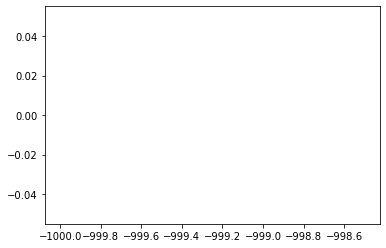

In [850]:
plt.hist(glob_np[interesting_variable], bins=100, range=(-1000,-998.5))

(array([     0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0., 262942.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
      

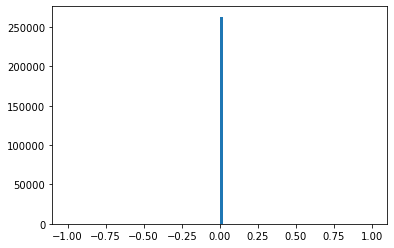

In [851]:
plt.hist(glob_np[interesting_variable], bins=100, range=(-1,1))

(array([     0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0., 262942.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
      

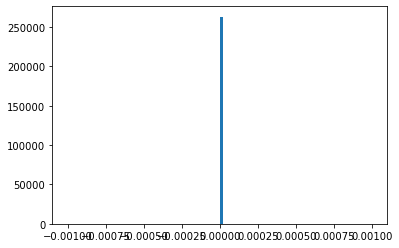

In [852]:
plt.hist(glob_np[interesting_variable], bins=100, range=(-0.001,0.001))

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-1.0001e+01, -9.9010e+00, -9.8010e+00, -9.7010e+00, -9.6010e+00,
        -9.5010e+00, -9.4010e+00, -9.3010e+00, -9.2010e+00, -9.1010e+00,
        -9.0010e+00, -8.9010e+00, -8.8010e+00, -8.7010e+00, -8.6010e+00,
        -8.5010e+00, -8.4010e+00, -8.3010e+00, -8.2010e+00, -8.1010e+00,
        -8.0010e+00, -7.9010e+00, -7.8010e+00, -7.7010e+00, -7.6010e+00,
        -7.5010e+00, -7.4010e+00, -7.3010e+00, -7.2010e+00, -7.1010e+00,
        -7.0010e+00, -6.9010e+00, -6.8010e+00, -6.7010e+00, -6.6010e+00,
        -6.5010e+00, -6.4010e+00, -6.30

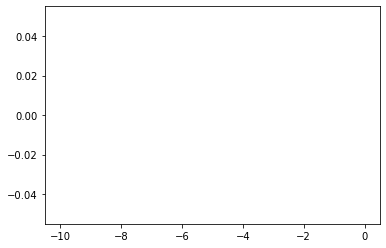

In [853]:
plt.hist(glob_np[interesting_variable], bins=100, range=(-10.001,-0.001))

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.001  , 0.00599, 0.01098, 0.01597, 0.02096, 0.02595, 0.03094,
        0.03593, 0.04092, 0.04591, 0.0509 , 0.05589, 0.06088, 0.06587,
        0.07086, 0.07585, 0.08084, 0.08583, 0.09082, 0.09581, 0.1008 ,
        0.10579, 0.11078, 0.11577, 0.12076, 0.12575, 0.13074, 0.13573,
        0.14072, 0.14571, 0.1507 , 0.15569, 0.16068, 0.16567, 0.17066,
        0.17565, 0.18064, 0.18563, 0.19062, 0.19561, 0.2006 , 0.20559,
        0.21058, 0.21557, 0.22056, 0.22555, 0.23054, 0.23553, 0.24052,
        0.24551, 0.2505 , 0.25549, 0.26048, 0.26547, 

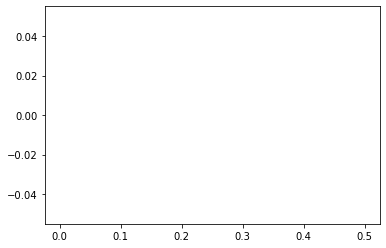

In [854]:
plt.hist(glob_np[interesting_variable], bins=100, range=(0.001,0.5))

(array([2.62942e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 5.05730e+04, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        2.99210e+04, 0.00000e+00, 0.00000e+00, 2.07230e+04, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.32890e+04, 0.00000e+00, 0.00000e+00,
        8.59000e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 5.36800e+03,
        0.00000e+00, 0.00000e+00, 3.32300e+03, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 2.01400e+03, 0.00000e+00, 0.00000e+00, 1.24800e+03,
        0.00000e+00, 0.00000e+00, 7.06000e+02, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 4.49000e+02, 0.00000e+00, 0.00000e+00, 3.22000e+02,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.96000e+02, 0.00000e+00,
        0.00000e+00, 1.06000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        6.80000e+01, 0.00000e+00, 0.00000e+00, 6.30000e+01, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 3.70000e+01, 0.00000e+00, 0.00000e+00,
        1.60000e+01, 0.00000e+00, 0.00000e+00, 1.50

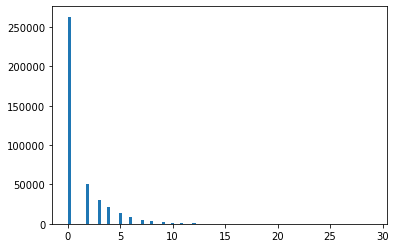

In [855]:
plt.hist(glob_np[interesting_variable], bins=100)

In [841]:
first_cpf_stuff = ak.to_numpy(df_cpf_clip[:,0])

In [37]:
first_cpf_stuff

array([(3.9922452, 0.15719667, 5.69242  , 0.11835653, 0.99961895, 0.06554688, 8.66898   , -0.08118549, -1.       , -0.08117825, -0.94277656,  0.        , -0.06390209, 1., 1., 1., 5.),
       (3.6416776, 0.1746006 , 4.261532 , 0.0572213 , 0.9991617 , 0.00546387, 1.6850264 ,  0.00576854,  1.6992868, -0.00497175, -0.9101652 ,  0.        , -0.06240688, 7., 1., 0., 5.),
       (3.94369  , 0.07909249, 4.1380453, 0.04106777, 0.9998174 , 0.00271729, 0.29778674,  0.01220525,  1.3711841, -0.01216949, -0.92804575, -0.06095362,  0.00505973, 7., 1., 0., 5.),
       ...,
       (3.184486 , 0.20769876, 3.017041 , 0.15494269, 0.99763876, 0.00351074, 0.41515988,  0.00842686,  1.0017215, -0.00839632, -0.9424196 ,  0.        , -0.08346832, 7., 1., 0., 5.),
       (2.6816764, 1.1022617 , 8.078046 , 0.2175034 , 0.9908185 , 0.00584961, 2.0261605 ,  0.00617605,  2.099026 , -0.00109233, -0.96379673,  0.        ,  0.        , 7., 1., 0., 5.),
       (2.8471365, 0.27434248, 2.6440926, 0.2633677 , 0.9946603 , 0.

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-1000.  ,  -999.98,  -999.96,  -999.94,  -999.92,  -999.9 ,
         -999.88,  -999.86,  -999.84,  -999.82,  -999.8 ,  -999.78,
         -999.76,  -999.74,  -999.72,  -999.7 ,  -999.68,  -999.66,
         -999.64,  -999.62,  -999.6 ,  -999.58,  -999.56,  -999.54,
         -999.52,  -999.5 ,  -999.48,  -999.46,  -999.44,  -999.42,
         -999.4 ,  -999.38,  -999.36,  -999.34,  -999.32,  -999.3 ,
         -999.28,  -999.26,  -999.24,  -999.22,  -999.2 ,  -999.18,
         -999.16,  -999.14,  -999.12,  -999.1 ,  -999.08,  -999.06,
      

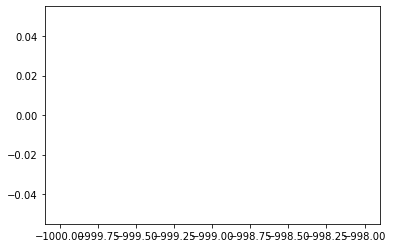

In [856]:
interesting_variable = 'Cpfcan_ptrel'
#plt.hist(first_cpf_stuff[interesting_variable],bins=100)
plt.hist(first_cpf_stuff[interesting_variable],bins=100,range=(-1000,-998))

(array([    0., 76840., 45746., 36520., 30262., 27297., 24704., 20497.,
        16810., 13617., 11409.,  9710.,  8268.,  7116.,  6323.,  5493.,
         4891.,  4381.,  3796.,  3494.,  2996.,  2737.,  2505.,  2383.,
         2081.,  1859.,  1835.,  1570.,  1394.,  1409.,  1160.,  1095.,
          942.,   975.,   875.,   831.,   724.,   634.,   606.,   569.,
          492.,   488.,   447.,   434.,   430.,   343.,   352.,   333.,
          293.,   283.,   284.,   260.,   244.,   205.,   216.,   198.,
          182.,   180.,   168.,   163.,   131.,   141.,   130.,   126.,
          117.,   118.,   115.,    98.,   115.,    98.,    88.,   104.,
           81.,    88.,    78.,    88.,    88.,    95.,    82.,    86.,
           98.,    98.,   110.,   133.,   131.,   125.,   125.,   135.,
          142.,   166.,   181.,   164.,   190.,   196.,   213.,   204.,
          187.,   152.,   118.,  1364.]),
 array([-1.01  , -0.9999, -0.9898, -0.9797, -0.9696, -0.9595, -0.9494,
        -0.9393, -0.929

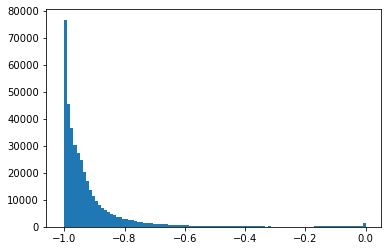

In [857]:
plt.hist(first_cpf_stuff[interesting_variable],bins=100,range=(-1.01,0))

(array([  52.,   49.,   54.,   59.,   60.,   53.,   42.,   55.,   43.,
          50.,   47.,   40.,   46.,   52.,   41.,   45.,   43.,   39.,
          46.,   48.,   45.,   45.,   33.,   42.,   29.,   32.,   45.,
          38.,   44.,   33.,   31.,   37.,   37.,   29.,   27.,   41.,
          24.,   41.,   37.,   30.,   28.,   41.,   29.,   48.,   34.,
          26.,   38.,   34.,   38.,   41.,   39.,   30.,   36.,   40.,
          43.,   45.,   43.,   60.,   51.,   47.,   56.,   43.,   50.,
          52.,   51.,   42.,   51.,   49.,   58.,   57.,   53.,   61.,
          53.,   65.,   78.,   73.,   69.,   62.,   71.,   61.,   82.,
          73.,   80.,   80.,   81.,   77.,   84.,   91.,   79.,   77.,
          72.,   75.,   72.,   56.,   61.,   60.,   38.,   30.,   23.,
        1325.]),
 array([-0.4  , -0.396, -0.392, -0.388, -0.384, -0.38 , -0.376, -0.372,
        -0.368, -0.364, -0.36 , -0.356, -0.352, -0.348, -0.344, -0.34 ,
        -0.336, -0.332, -0.328, -0.324, -0.32 , -0.316, -0

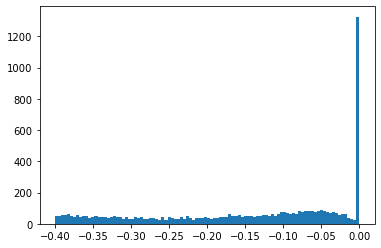

In [858]:
plt.hist(first_cpf_stuff[interesting_variable],bins=100,range=(-0.40,0))

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,   71.,  678.,
        1151., 1723., 2025., 2261., 2453., 2487., 2389., 2451., 2409.,
        2356., 2218., 2169., 2187., 2016., 1976., 1922., 1912., 1795.,
        1670., 1714., 1632., 1619., 1539., 1493., 1517., 1496., 1372.,
        1385., 1365., 1322., 1337., 1261., 1265., 1227., 1256., 1216.,
        1225., 1196., 1191., 1155., 1213., 1125., 1102., 1109., 1038.,
        1109.]),
 array([-1.01  , -1.0098, -1.0096, -1.0094, -1.0092, -1.009 , -1.0088,
        -1.0086, -1.0084, -1.0082, -1.008 , -1.0078, -1.0076, -1.0074,
        -1.0072, -1.007 , -1.0068, -1.0066, -1.0064, -1.0062

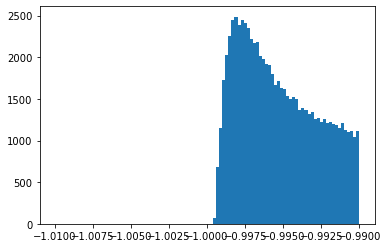

In [859]:
plt.hist(first_cpf_stuff[interesting_variable],bins=100,range=(-1.01,-0.99))

(array([2.000e+00, 3.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 3.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 5.000e+00, 2.663e+03, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

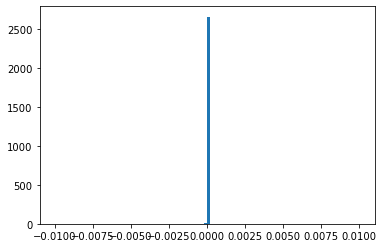

In [860]:
plt.hist(first_cpf_stuff[interesting_variable],bins=100,range=(-0.01,0.01))

(array([2663.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29

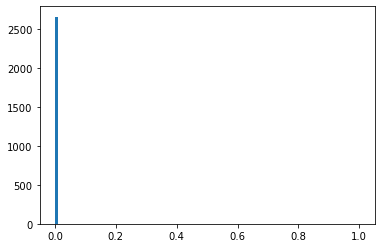

In [861]:
plt.hist(first_cpf_stuff[interesting_variable],bins=100,range=(0,1))

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.95 , 0.951, 0.952, 0.953, 0.954, 0.955, 0.956, 0.957, 0.958,
        0.959, 0.96 , 0.961, 0.962, 0.963, 0.964, 0.965, 0.966, 0.967,
        0.968, 0.969, 0.97 , 0.971, 0.972, 0.973, 0.974, 0.975, 0.976,
        0.977, 0.978, 0.979, 0.98 , 0.981, 0.982, 0.983, 0.984, 0.985,
        0.986, 0.987, 0.988, 0.989, 0.99 , 0.991, 0.992, 0.993, 0.994,
        0.995, 0.996, 0.997, 0.998, 0.999, 1.   , 1.001, 1.002, 1.003,
        1.004, 1.005, 1.006, 1.007, 1.008, 1.009, 1.01 , 1.011, 1.012,
        1.013, 1.014, 1.015, 1.016, 1.017, 1.018, 1.0

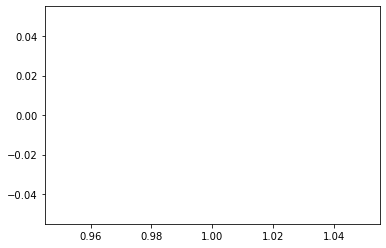

In [862]:
plt.hist(first_cpf_stuff[interesting_variable],bins=100,range=(0.95,1.05))

(array([2663.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
        1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45

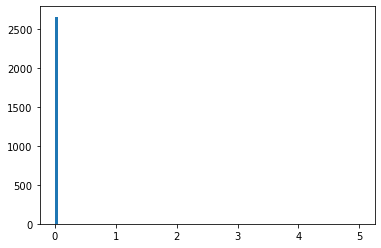

In [863]:
plt.hist(first_cpf_stuff[interesting_variable],bins=100,range=(0,5))

(array([7.8461e+04, 4.4876e+04, 3.6061e+04, 2.9939e+04, 2.7004e+04,
        2.4513e+04, 2.0388e+04, 1.6821e+04, 1.3546e+04, 1.1446e+04,
        9.6750e+03, 8.2570e+03, 7.1500e+03, 6.3230e+03, 5.5500e+03,
        4.9000e+03, 4.4130e+03, 3.8660e+03, 3.4590e+03, 3.0160e+03,
        2.7920e+03, 2.4810e+03, 2.4350e+03, 2.1080e+03, 1.8700e+03,
        1.8010e+03, 1.6130e+03, 1.4570e+03, 1.3570e+03, 1.2280e+03,
        1.0910e+03, 1.0030e+03, 8.9900e+02, 9.0600e+02, 8.4700e+02,
        7.6500e+02, 6.4800e+02, 5.9700e+02, 5.9400e+02, 5.2300e+02,
        4.8700e+02, 4.3700e+02, 4.4500e+02, 4.3000e+02, 3.6900e+02,
        3.4800e+02, 3.3900e+02, 3.1400e+02, 2.5700e+02, 2.8700e+02,
        2.7400e+02, 2.4600e+02, 2.2100e+02, 2.2000e+02, 2.0400e+02,
        1.8000e+02, 1.9300e+02, 1.7200e+02, 1.4900e+02, 1.5300e+02,
        1.2400e+02, 1.5000e+02, 1.2200e+02, 1.2100e+02, 1.1600e+02,
        1.1100e+02, 1.0200e+02, 1.1700e+02, 1.0900e+02, 8.4000e+01,
        9.7000e+01, 9.5000e+01, 9.0000e+01, 7.20

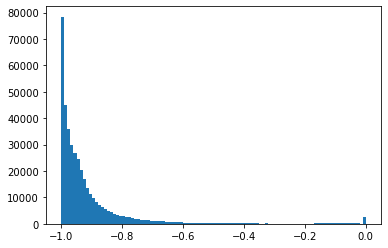

In [864]:
plt.hist(first_cpf_stuff[interesting_variable],bins=100)

In [865]:
first_cpf_pts_stuff = ak.to_numpy(df_cpf_pts_clip[:,0])

In [866]:
first_cpf_pts_stuff

array([(1.3896484,  2.0883815,  0.8814652 , 5.6962996),
       (3.0117188,  0.8833277, -3.0601487 , 4.2673883),
       (1.9306641, -1.3962218,  2.7882638 , 4.1411524), ...,
       (1.3056641, -1.4828334, -1.0367578 , 3.0273986),
       (5.1171875,  1.0415357,  1.0335258 , 8.154096 ),
       (1.0712891, -1.5586413, -0.21777096, 2.661946 )],
      dtype=[('Cpfcan_pt', '<f4'), ('Cpfcan_eta', '<f4'), ('Cpfcan_phi', '<f4'), ('Cpfcan_e', '<f4')])

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-1000.   ,  -999.985,  -999.97 ,  -999.955,  -999.94 ,  -999.925,
         -999.91 ,  -999.895,  -999.88 ,  -999.865,  -999.85 ,  -999.835,
         -999.82 ,  -999.805,  -999.79 ,  -999.775,  -999.76 ,  -999.745,
         -999.73 ,  -999.715,  -999.7  ,  -999.685,  -999.67 ,  -999.655,
         -999.64 ,  -999.625,  -999.61 ,  -999.595,  -999.58 ,  -999.565,
         -999.55 ,  -999.535,  -999.52 ,  -999.505,  -999.49 ,  -999.475,
         -999.46 ,  -999.445,  -999.43 ,  -999.415,  -999.4  ,  -999.385,
         -999.37 ,  -999.355,  -

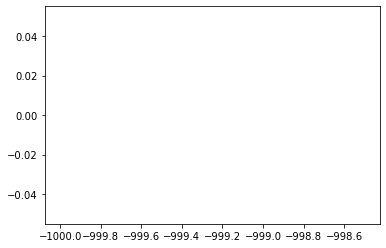

In [670]:
interesting_variable = 'Cpfcan_e'
#plt.hist(first_cpf_stuff[interesting_variable],bins=100)
plt.hist(first_cpf_pts_stuff[interesting_variable],bins=100,range=(-1000,-998.5))

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1303.]),
 array([-1.01  , -0.9999, -0.9898, -0.9797, -0.9696, -0.9595, -0.9494,
        -0.9393, -0.9292, -0.9191, -0.909 , -0.8989, -0.8888, -0.8787,
        -0.8686, -0.8585, -0.8484, -0.8383, -0.8282, -0.8181

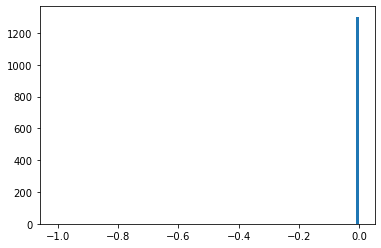

In [671]:
plt.hist(first_cpf_pts_stuff[interesting_variable],bins=100,range=(-1.01,0))

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1303.]),
 array([-0.4  , -0.396, -0.392, -0.388, -0.384, -0.38 , -0.376, -0.372,
        -0.368, -0.364, -0.36 , -0.356, -0.352, -0.348, -0.344, -0.34 ,
        -0.336, -0.332, -0.328, -0.324, -0.32 , -0.316, -0

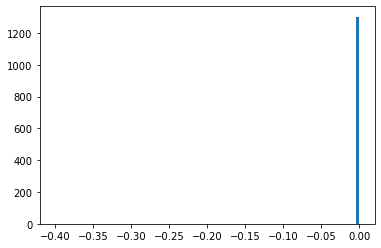

In [672]:
plt.hist(first_cpf_pts_stuff[interesting_variable],bins=100,range=(-0.40,0))

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-1.01  , -1.0098, -1.0096, -1.0094, -1.0092, -1.009 , -1.0088,
        -1.0086, -1.0084, -1.0082, -1.008 , -1.0078, -1.0076, -1.0074,
        -1.0072, -1.007 , -1.0068, -1.0066, -1.0064, -1.0062, -1.006 ,
        -1.0058, -1.0056, -1.0054, -1.0052, -1.005 , -1.0048, -1.0046,
        -1.0044, -1.0042, -1.004 , -1.0038, -1.0036, -1.0034, -1.0032,
        -1.003 , -1.0028, -1.0026, -1.0024, -1.0022, -1.002 , -1.0018,
        -1.0016, -1.0014, -1.0012, -1.001 , -1.0008, -1.0006, -1.0004,
        -1.0002, -1.    , -0.9998, -0.9996, -0.9994, 

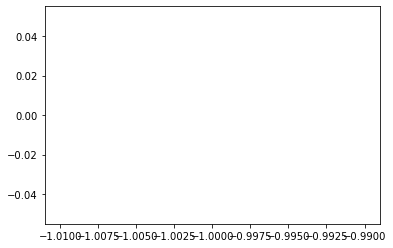

In [673]:
plt.hist(first_cpf_pts_stuff[interesting_variable],bins=100,range=(-1.01,-0.99))

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0., 2655.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.]),
 array([-0.01  , -0.0098, -0.0096, -0.0094, -0.0092, -0.009 , -0.0088,
        -0.0086, -0.0084, -0.0082, -0.008 , -0.0078, -0.0076, -0.0074,
        -0.0072, -0.007 , -0.0068, -0.0066, -0.0064, -0.0062

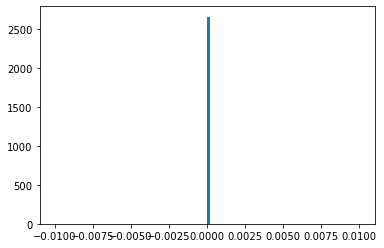

In [674]:
plt.hist(first_cpf_pts_stuff[interesting_variable],bins=100,range=(-0.01,0.01))

(array([2.655e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

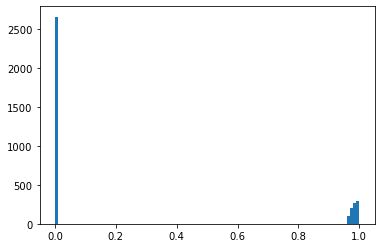

In [675]:
plt.hist(first_cpf_pts_stuff[interesting_variable],bins=100,range=(0,1))

(array([ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  5.,  7.,
         9., 13., 11., 14., 12., 15., 16., 17., 20., 13., 19., 19., 23.,
        25., 22., 21., 22., 26., 27., 15., 28., 26., 28., 20., 43., 21.,
        32., 17., 28., 19., 30., 27., 28., 32., 36., 36., 39., 30., 32.,
        40., 33., 35., 24., 25., 43., 39., 36., 43., 33., 36., 42., 49.,
        41., 43., 35., 40., 29., 38., 49., 37., 32., 49., 47., 38., 43.,
        55., 48., 39., 52., 44., 51., 40., 53., 50., 41., 47., 47., 41.,
        42., 56., 43., 43., 42., 32., 43., 49., 50.]),
 array([0.95 , 0.951, 0.952, 0.953, 0.954, 0.955, 0.956, 0.957, 0.958,
        0.959, 0.96 , 0.961, 0.962, 0.963, 0.964, 0.965, 0.966, 0.967,
        0.968, 0.969, 0.97 , 0.971, 0.972, 0.973, 0.974, 0.975, 0.976,
        0.977, 0.978, 0.979, 0.98 , 0.981, 0.982, 0.983, 0.984, 0.985,
        0.986, 0.987, 0.988, 0.989, 0.99 , 0.991, 0.992, 0.993, 0.994,
        0.995, 0.996, 0.997, 0.998, 0.999, 1.   , 1.001, 1.002, 1.003,
        

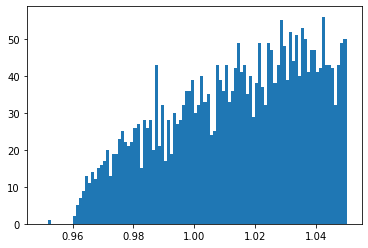

In [676]:
plt.hist(first_cpf_pts_stuff[interesting_variable],bins=100,range=(0.95,1.05))

(array([2655.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,  864., 2069., 2595., 3035., 3231., 3517., 3592., 3636.,
        3723., 3819., 3864., 3781., 3753., 3747., 3663., 3726., 3688.,
        3643., 3468., 3570., 3424., 3469., 3448., 3388., 3275., 3160.,
        3155., 3168., 3139., 3014., 3104., 3019., 2965., 3033., 2971.,
        2819., 2827., 2804., 2772., 2753., 2653., 2657., 2619., 2649.,
        2636., 2574., 2464., 2457., 2332., 2360., 2369., 2313., 2227.,
        2254., 2188., 2129., 2129., 2066., 1983., 2002., 2022., 2040.,
        2007., 1944., 1878., 1900., 1890., 1841., 1772., 1773., 1766.,
        1696., 1719., 1655., 1661., 1672., 1658., 1562., 1603., 1572.,
        1475.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
        1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45

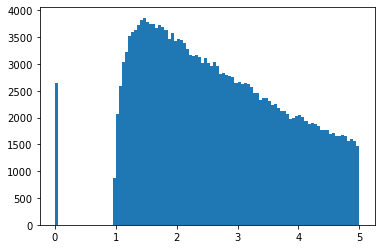

In [677]:
plt.hist(first_cpf_pts_stuff[interesting_variable],bins=100,range=(0,5))

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.655e+03, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 4.452e+03, 7.341e+03,
        8.546e+03, 9.008e+03, 9.122e+03, 8.912e+03, 8.921e+03, 8.491e+03,
        8.421e+03, 8.165e+03, 7.667e+03, 7.563e+03, 7.313e+03, 7.241e+03,
        6.920e+03, 6.780e+03, 6.480e+03, 6.341e+03, 6.252e+03, 5.963e+03,
        5.648e+03, 5.453e+03, 5.287e+0

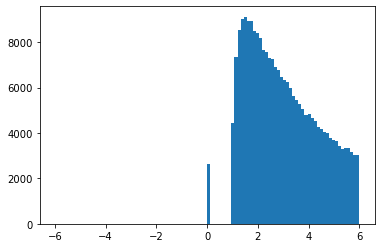

In [678]:
plt.hist(first_cpf_pts_stuff[interesting_variable],bins=100,range=(-6,6))

(array([3.76744e+05, 1.37150e+04, 4.00200e+03, 1.86000e+03, 1.03700e+03,
        6.70000e+02, 4.58000e+02, 3.06000e+02, 2.41000e+02, 1.60000e+02,
        1.35000e+02, 9.70000e+01, 7.30000e+01, 7.00000e+01, 6.10000e+01,
        5.00000e+01, 4.00000e+01, 3.50000e+01, 3.70000e+01, 2.50000e+01,
        1.70000e+01, 2.20000e+01, 1.50000e+01, 1.10000e+01, 9.00000e+00,
        1.20000e+01, 7.00000e+00, 1.20000e+01, 7.00000e+00, 8.00000e+00,
        7.00000e+00, 9.00000e+00, 2.00000e+00, 3.00000e+00, 1.00000e+00,
        3.00000e+00, 2.00000e+00, 1.00000e+00, 5.00000e+00, 2.00000e+00,
        3.00000e+00, 0.00000e+00, 0.00000e+00, 3.00000e+00, 1.00000e+00,
        3.00000e+00, 2.00000e+00, 1.00000e+00, 1.00000e+00, 3.00000e+00,
        1.00000e+00, 2.00000e+00, 2.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00

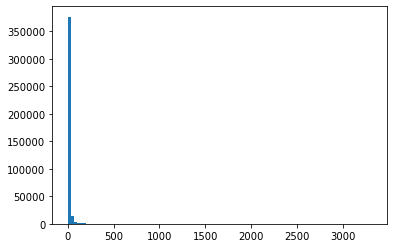

In [679]:
plt.hist(first_cpf_pts_stuff[interesting_variable],bins=100)

In [681]:
first_npf_pts_stuff = ak.to_numpy(df_npf_pts_clip[:,0])

In [682]:
first_npf_pts_stuff

array([( 1.9892578,  1.9946288,  0.70148134,   7.445333 ),
       ( 8.25     ,  0.9042024, -2.837976  ,  11.858656 ),
       ( 5.5976562, -1.3022858,  2.7187338 ,  11.05426  ), ...,
       ( 4.6054688, -1.2916654, -1.1046214 ,   9.012107 ),
       (77.125    ,  1.0591143,  0.7885982 , 124.579185 ),
       ( 1.0810547, -1.6154058,  0.25079796,   2.8262763)],
      dtype=[('Npfcan_pt', '<f4'), ('Npfcan_eta', '<f4'), ('Npfcan_phi', '<f4'), ('Npfcan_e', '<f4')])

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-1000.   ,  -999.985,  -999.97 ,  -999.955,  -999.94 ,  -999.925,
         -999.91 ,  -999.895,  -999.88 ,  -999.865,  -999.85 ,  -999.835,
         -999.82 ,  -999.805,  -999.79 ,  -999.775,  -999.76 ,  -999.745,
         -999.73 ,  -999.715,  -999.7  ,  -999.685,  -999.67 ,  -999.655,
         -999.64 ,  -999.625,  -999.61 ,  -999.595,  -999.58 ,  -999.565,
         -999.55 ,  -999.535,  -999.52 ,  -999.505,  -999.49 ,  -999.475,
         -999.46 ,  -999.445,  -999.43 ,  -999.415,  -999.4  ,  -999.385,
         -999.37 ,  -999.355,  -

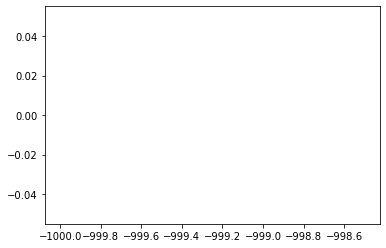

In [715]:
interesting_variable = 'Npfcan_e'
#plt.hist(first_cpf_stuff[interesting_variable],bins=100)
plt.hist(first_npf_pts_stuff[interesting_variable],bins=100,range=(-1000,-998.5))

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6483.]),
 array([-1.01  , -0.9999, -0.9898, -0.9797, -0.9696, -0.9595, -0.9494,
        -0.9393, -0.9292, -0.9191, -0.909 , -0.8989, -0.8888, -0.8787,
        -0.8686, -0.8585, -0.8484, -0.8383, -0.8282, -0.8181

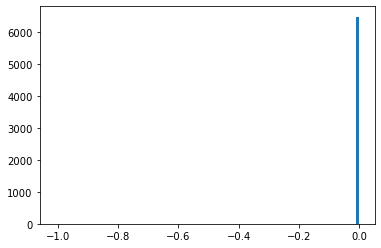

In [716]:
plt.hist(first_npf_pts_stuff[interesting_variable],bins=100,range=(-1.01,0))

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6483.]),
 array([-0.4  , -0.396, -0.392, -0.388, -0.384, -0.38 , -0.376, -0.372,
        -0.368, -0.364, -0.36 , -0.356, -0.352, -0.348, -0.344, -0.34 ,
        -0.336, -0.332, -0.328, -0.324, -0.32 , -0.316, -0

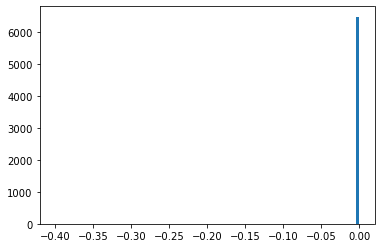

In [717]:
plt.hist(first_npf_pts_stuff[interesting_variable],bins=100,range=(-0.40,0))

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-1.01  , -1.0098, -1.0096, -1.0094, -1.0092, -1.009 , -1.0088,
        -1.0086, -1.0084, -1.0082, -1.008 , -1.0078, -1.0076, -1.0074,
        -1.0072, -1.007 , -1.0068, -1.0066, -1.0064, -1.0062, -1.006 ,
        -1.0058, -1.0056, -1.0054, -1.0052, -1.005 , -1.0048, -1.0046,
        -1.0044, -1.0042, -1.004 , -1.0038, -1.0036, -1.0034, -1.0032,
        -1.003 , -1.0028, -1.0026, -1.0024, -1.0022, -1.002 , -1.0018,
        -1.0016, -1.0014, -1.0012, -1.001 , -1.0008, -1.0006, -1.0004,
        -1.0002, -1.    , -0.9998, -0.9996, -0.9994, 

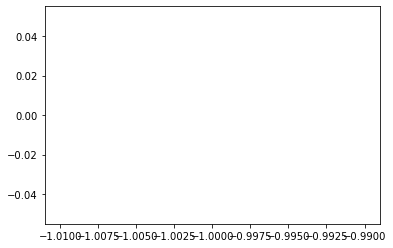

In [718]:
plt.hist(first_npf_pts_stuff[interesting_variable],bins=100,range=(-1.01,-0.99))

(array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0., 12956.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.]),
 array([-0.01  , -0.0098, -0.0096, -0.0094, -0.0092, -0.009 , -0.0088,
        -0.0086, -0.008

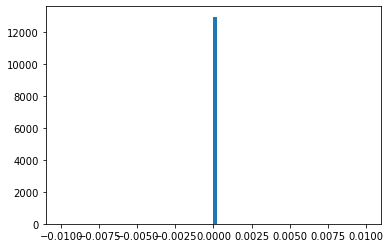

In [719]:
plt.hist(first_npf_pts_stuff[interesting_variable],bins=100,range=(-0.01,0.01))

(array([12956.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,    30.,
           63.,    81.,    86.,    83.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 

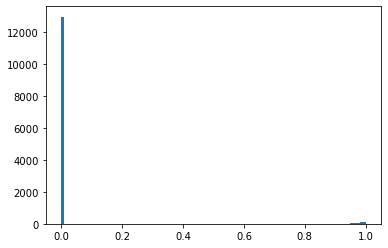

In [720]:
plt.hist(first_npf_pts_stuff[interesting_variable],bins=100,range=(0,1))

(array([ 2.,  1.,  0.,  1.,  2.,  6.,  3.,  5.,  5.,  5.,  5.,  5.,  6.,
         8.,  5.,  5.,  8.,  8.,  7.,  6.,  7., 12.,  6.,  8.,  9., 11.,
         7.,  7.,  6.,  8.,  5., 10.,  8., 11.,  6., 11.,  7.,  7.,  8.,
        13.,  4., 10.,  9.,  4.,  7., 13.,  9., 11., 10.,  6., 12., 23.,
        14., 14., 21., 15., 12., 21., 13., 14., 12., 21., 26., 11., 15.,
        20., 18., 15., 17., 15., 16., 16., 17., 20., 22., 18., 15., 18.,
        23., 15., 12., 24., 27., 19., 29., 23., 27., 18., 16., 25., 14.,
        18., 22., 18., 15., 14., 25., 19., 18., 17.]),
 array([0.95 , 0.951, 0.952, 0.953, 0.954, 0.955, 0.956, 0.957, 0.958,
        0.959, 0.96 , 0.961, 0.962, 0.963, 0.964, 0.965, 0.966, 0.967,
        0.968, 0.969, 0.97 , 0.971, 0.972, 0.973, 0.974, 0.975, 0.976,
        0.977, 0.978, 0.979, 0.98 , 0.981, 0.982, 0.983, 0.984, 0.985,
        0.986, 0.987, 0.988, 0.989, 0.99 , 0.991, 0.992, 0.993, 0.994,
        0.995, 0.996, 0.997, 0.998, 0.999, 1.   , 1.001, 1.002, 1.003,
        

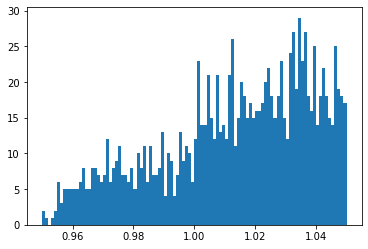

In [721]:
plt.hist(first_npf_pts_stuff[interesting_variable],bins=100,range=(0.95,1.05))

(array([12956.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,   343.,   909.,  1160.,  1279.,  1365.,
         1512.,  1557.,  1567.,  1592.,  1690.,  1655.,  1661.,  1709.,
         1704.,  1692.,  1716.,  1658.,  1722.,  1807.,  1726.,  1826.,
         1751.,  1794.,  1654.,  1746.,  1425.,  1298.,  1260.,  1235.,
         1412.,  2617.,  1971.,  1755.,  1777.,  1726.,  1642.,  1594.,
         1599.,  1624.,  1471.,  1554.,  1392.,  1364.,  1374.,  1363.,
         1404.,  1302.,  1318.,  1347.,  1325.,  1310.,  1286.,  1269.,
         1244.,  1224.,  1274.,  1301.,  1224.,  1187.,  1177.,  1199.,
         1215.,  1179.,  1128.,  1113.,  1153.,  1091.,  1063.,  1102.,
         1079.,  1054.,  1090.,  1090.,  1072.,  1007.,  1003.,  1092.,
         1052.,   997.,  1045.,   980.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 

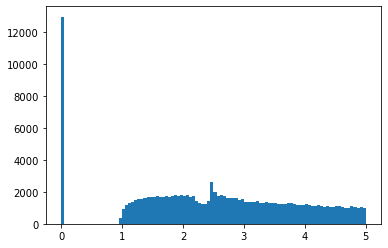

In [722]:
plt.hist(first_npf_pts_stuff[interesting_variable],bins=100,range=(0,5))

(array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0., 12956.,     0.,     0.,     0.,     0.,     0.,
            0.,    30.,  1901.,  3125.,  3690.,  3888.,  4013.,  4090.,
         4032.,  4228.,  4251.,  4162.,  3537.,  3066.,  4832.,  4344.,
         4063.,  3810.,  3693.,  3323.,  3277.,  3161.,  3219.,  3074.,
         2999.,  3058.,  2816.,  2879.,  2713.,  2663.,  2612.,  2594.,
         2502.,  2525.,  2463.,  2372.,  2363.,  2250.,  2217.,  2255.,
         2200.,  2090.,  2078.,  2033.]),
 array([-6.  , -5.88, -5.76, -5.64, -5.52, -5.4 , -5.28, -5.16, -5.04,
        -4.92, -4.8 , -

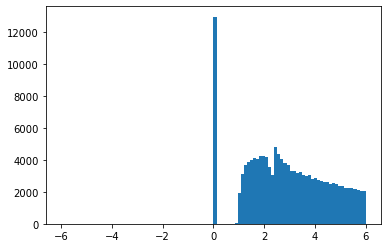

In [723]:
plt.hist(first_npf_pts_stuff[interesting_variable],bins=100,range=(-6,6))

(array([2.87084e+05, 3.07960e+04, 1.46980e+04, 9.72300e+03, 7.56100e+03,
        6.01100e+03, 5.24400e+03, 4.28300e+03, 3.77400e+03, 3.20000e+03,
        2.91700e+03, 2.64000e+03, 2.24000e+03, 2.15700e+03, 1.86500e+03,
        1.58900e+03, 1.44700e+03, 1.35400e+03, 1.15400e+03, 1.05300e+03,
        9.00000e+02, 8.82000e+02, 7.91000e+02, 6.72000e+02, 6.30000e+02,
        5.04000e+02, 4.94000e+02, 4.40000e+02, 3.88000e+02, 3.73000e+02,
        3.26000e+02, 3.09000e+02, 2.55000e+02, 2.01000e+02, 1.81000e+02,
        1.90000e+02, 1.78000e+02, 1.63000e+02, 1.46000e+02, 1.16000e+02,
        1.11000e+02, 1.02000e+02, 7.50000e+01, 7.10000e+01, 7.20000e+01,
        7.10000e+01, 6.20000e+01, 4.90000e+01, 4.00000e+01, 3.90000e+01,
        3.00000e+01, 3.50000e+01, 3.20000e+01, 2.40000e+01, 3.10000e+01,
        2.20000e+01, 1.90000e+01, 2.10000e+01, 2.00000e+01, 1.80000e+01,
        1.40000e+01, 1.20000e+01, 1.30000e+01, 8.00000e+00, 1.20000e+01,
        9.00000e+00, 3.00000e+00, 5.00000e+00, 4.00

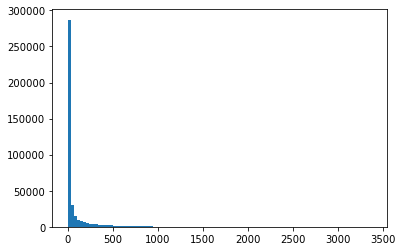

In [724]:
plt.hist(first_npf_pts_stuff[interesting_variable],bins=100)

In [726]:
first_vtx_pts_stuff = ak.to_numpy(df_vtx_pts_clip[:,0])

In [727]:
first_vtx_pts_stuff

array([(3.7754974e+24,  3.7754974e+24, 3.7754974e+24, 1.3022263e+23),
       (4.5640291e-41,  4.5640291e-41, 4.5640291e-41, 3.0740284e-41),
       (1.5937823e+01, -1.0883456e+00, 2.9302664e+00, 2.6627243e+01), ...,
       (0.0000000e+00, -3.7042856e-01, 0.0000000e+00, 0.0000000e+00),
       (2.8025829e-40,  4.4841789e-39, 2.8026109e-40, 2.5223470e-39),
       (0.0000000e+00,  0.0000000e+00, 0.0000000e+00, 0.0000000e+00)],
      dtype=[('sv_pt', '<f4'), ('sv_eta', '<f4'), ('sv_phi', '<f4'), ('sv_e', '<f4')])

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-1000.   ,  -999.985,  -999.97 ,  -999.955,  -999.94 ,  -999.925,
         -999.91 ,  -999.895,  -999.88 ,  -999.865,  -999.85 ,  -999.835,
         -999.82 ,  -999.805,  -999.79 ,  -999.775,  -999.76 ,  -999.745,
         -999.73 ,  -999.715,  -999.7  ,  -999.685,  -999.67 ,  -999.655,
         -999.64 ,  -999.625,  -999.61 ,  -999.595,  -999.58 ,  -999.565,
         -999.55 ,  -999.535,  -999.52 ,  -999.505,  -999.49 ,  -999.475,
         -999.46 ,  -999.445,  -999.43 ,  -999.415,  -999.4  ,  -999.385,
         -999.37 ,  -999.355,  -

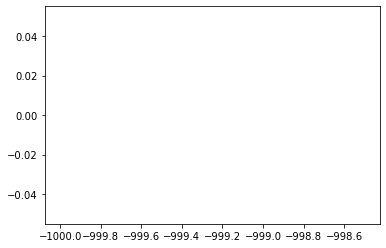

In [758]:
interesting_variable = 'sv_e'
#plt.hist(first_cpf_stuff[interesting_variable],bins=100)
plt.hist(first_vtx_pts_stuff[interesting_variable],bins=100,range=(-1000,-998.5))

(array([     0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
      

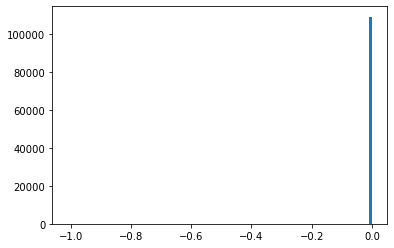

In [759]:
plt.hist(first_vtx_pts_stuff[interesting_variable],bins=100,range=(-1.01,0))

(array([     0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
      

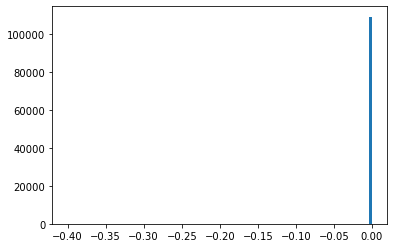

In [760]:
plt.hist(first_vtx_pts_stuff[interesting_variable],bins=100,range=(-0.40,0))

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-1.01  , -1.0098, -1.0096, -1.0094, -1.0092, -1.009 , -1.0088,
        -1.0086, -1.0084, -1.0082, -1.008 , -1.0078, -1.0076, -1.0074,
        -1.0072, -1.007 , -1.0068, -1.0066, -1.0064, -1.0062, -1.006 ,
        -1.0058, -1.0056, -1.0054, -1.0052, -1.005 , -1.0048, -1.0046,
        -1.0044, -1.0042, -1.004 , -1.0038, -1.0036, -1.0034, -1.0032,
        -1.003 , -1.0028, -1.0026, -1.0024, -1.0022, -1.002 , -1.0018,
        -1.0016, -1.0014, -1.0012, -1.001 , -1.0008, -1.0006, -1.0004,
        -1.0002, -1.    , -0.9998, -0.9996, -0.9994, 

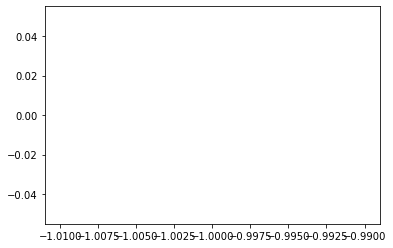

In [761]:
plt.hist(first_vtx_pts_stuff[interesting_variable],bins=100,range=(-1.01,-0.99))

(array([     0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0., 218618.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
      

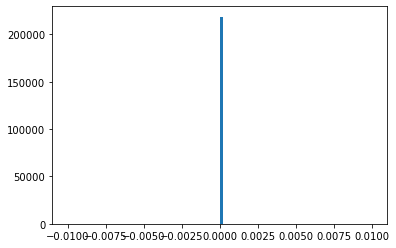

In [762]:
plt.hist(first_vtx_pts_stuff[interesting_variable],bins=100,range=(-0.01,0.01))

(array([218618.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
      

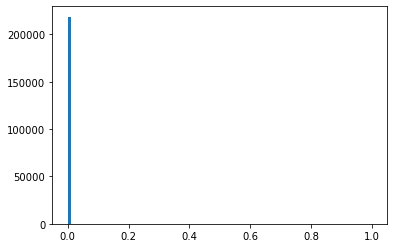

In [763]:
plt.hist(first_vtx_pts_stuff[interesting_variable],bins=100,range=(0,1))

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.95 , 0.951, 0.952, 0.953, 0.954, 0.955, 0.956, 0.957, 0.958,
        0.959, 0.96 , 0.961, 0.962, 0.963, 0.964, 0.965, 0.966, 0.967,
        0.968, 0.969, 0.97 , 0.971, 0.972, 0.973, 0.974, 0.975, 0.976,
        0.977, 0.978, 0.979, 0.98 , 0.981, 0.982, 0.983, 0.984, 0.985,
        0.986, 0.987, 0.988, 0.989, 0.99 , 0.991, 0.992, 0.993, 0.994,
        0.995, 0.996, 0.997, 0.998, 0.999, 1.   , 1.001, 1.002, 1.003,
        1.004, 1.005, 1.006, 1.007, 1.008, 1.009, 1.01 , 1.011, 1.012,
        1.013, 1.014, 1.015, 1.016, 1.017, 1.018, 1.0

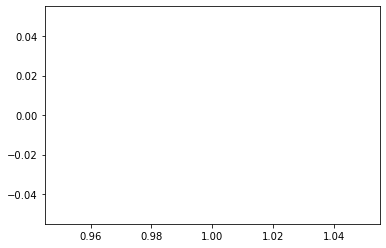

In [764]:
plt.hist(first_vtx_pts_stuff[interesting_variable],bins=100,range=(0.95,1.05))

(array([2.18618e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 1.00000e+00, 4.00000e+00, 3.00000e+00, 3.00000e+00,
        8.00000e+00, 2.00000e+00, 6.00000e+00, 1.40000e+01, 2.00000e+01,
        2.30000e+01, 2.50000e+01, 2.90000e+01, 3.40000e+01, 3.80000e+01,
        5.30000e+01, 6.10000e+01, 7.10000e+01, 8.20000e+01, 8.20000e+01,
        9.70000e+01, 1.07000e+02, 1.13000e+02, 1.08000e+02, 1.10000e+02,
        1.11000e+02, 1.35000e+02, 1.28000e+02, 1.46000e+02, 1.25000e+02,
        1.44000e+02, 1.25000e+02, 1.40000e+02, 1.39000e+02, 1.47000e+02,
        1.49000e+02, 1.64000e+02, 1.45000e+02, 1.90000e+02, 1.68000e+02,
        1.71000e+02, 1.77000e+02, 2.04000e+02, 1.74

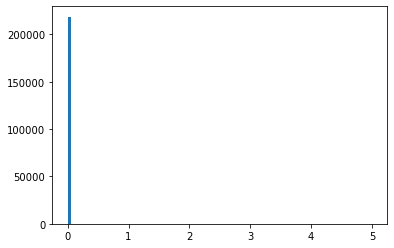

In [765]:
plt.hist(first_vtx_pts_stuff[interesting_variable],bins=100,range=(0,5))

(array([  14.,  183.,  838., 1278., 1666., 1904., 2038., 2175., 2076.,
        2099., 2080., 2215., 2199., 2138., 2086., 2101., 2030., 2002.,
        2022., 1945., 1890., 1869., 1900., 1796., 1843., 1776., 1728.,
        1680., 1696., 1593., 1596., 1561., 1566., 1565., 1522., 1450.,
        1401., 1383., 1383., 1308., 1265., 1257., 1278., 1291., 1256.,
        1173., 1180., 1201., 1090., 1111., 1087., 1132., 1072.,  993.,
        1014., 1001.,  947.,  945.,  985.,  935.,  924.,  990.,  908.,
         853.,  832.,  878.,  808.,  762.,  849.,  744.,  752.,  790.,
         732.,  720.,  701.,  737.,  707.,  705.,  688.,  631.,  671.,
         620.,  630.,  636.,  624.,  620.,  622.,  558.,  582.,  582.,
         568.,  561.,  544.,  516.,  545.,  516.,  532.,  514.,  506.,
         512.]),
 array([ 1.  ,  1.49,  1.98,  2.47,  2.96,  3.45,  3.94,  4.43,  4.92,
         5.41,  5.9 ,  6.39,  6.88,  7.37,  7.86,  8.35,  8.84,  9.33,
         9.82, 10.31, 10.8 , 11.29, 11.78, 12.27, 12.76, 13.

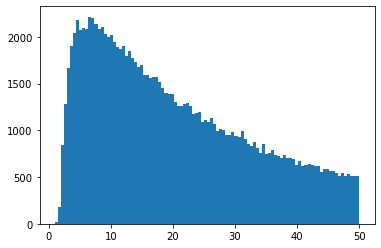

In [768]:
plt.hist(first_vtx_pts_stuff[interesting_variable],bins=100,range=(1,50))

(array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        2.18618e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00,
        1.00000e+00, 7.00000e+00, 1.20000e+01, 1.90000e+01, 4.60000e+01,
        6.30000e+01, 1.07000e+02, 1.51000e+02, 2.08

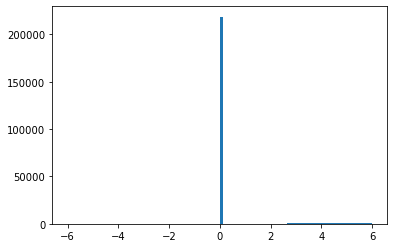

In [766]:
plt.hist(first_vtx_pts_stuff[interesting_variable],bins=100,range=(-6,6))

(array([3.99998e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

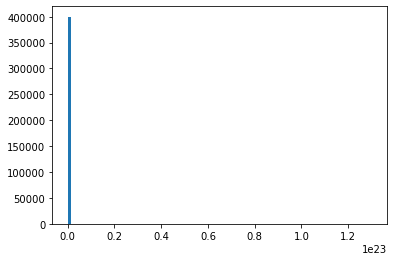

In [767]:
plt.hist(first_vtx_pts_stuff[interesting_variable],bins=100)

In [725]:
first_npf_stuff = ak.to_numpy(df_npf_clip[:,0])

In [206]:
df_npf_clip[1,:5]

<Record ... 0.953, 0.996, 0.992, 0.996, None]} type='{"Npfcan_ptrel": 5 * ?float...'>

In [170]:
first_npf_stuff

array([(-0.9180856 , -0.3130759 , -0.39300492, -0.38461998, 0., 1.,  0.        , 0.99607843),
       (-0.7539155 , -0.4410702 , -0.32055998, -0.4111312 , 0., 1.,  0.        , 0.9529412 ),
       (-0.7913799 , -0.4007398 , -0.38974875, -0.4516493 , 0., 1., -0.09914047, 0.9843137 ),
       ...,
       (-0.79689664, -0.37042856, -0.4256908 , -0.45063263, 1., 0.,  0.        , 0.9647059 ),
       (-0.45435286, -0.4963578 , -0.4721288 , -0.57189184, 1., 0.,  0.        , 0.99607843),
       (-0.9347186 , -0.49552798, -0.2895552 , -0.3895077 , 1., 0.,  0.        , 0.96862745)],
      dtype=[('Npfcan_ptrel', '<f4'), ('Npfcan_etarel', '<f4'), ('Npfcan_phirel', '<f4'), ('Npfcan_deltaR', '<f4'), ('Npfcan_isGamma', '<f4'), ('Npfcan_HadFrac', '<f4'), ('Npfcan_drminsv', '<f4'), ('Npfcan_puppiw', '<f4')])

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-1000.  ,  -999.98,  -999.96,  -999.94,  -999.92,  -999.9 ,
         -999.88,  -999.86,  -999.84,  -999.82,  -999.8 ,  -999.78,
         -999.76,  -999.74,  -999.72,  -999.7 ,  -999.68,  -999.66,
         -999.64,  -999.62,  -999.6 ,  -999.58,  -999.56,  -999.54,
         -999.52,  -999.5 ,  -999.48,  -999.46,  -999.44,  -999.42,
         -999.4 ,  -999.38,  -999.36,  -999.34,  -999.32,  -999.3 ,
         -999.28,  -999.26,  -999.24,  -999.22,  -999.2 ,  -999.18,
         -999.16,  -999.14,  -999.12,  -999.1 ,  -999.08,  -999.06,
      

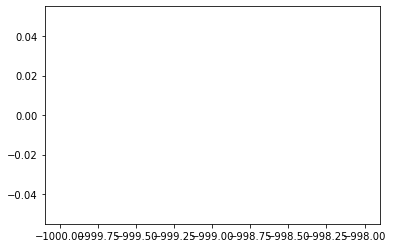

In [291]:
interesting_variable = 'Npfcan_drminsv'
#plt.hist(first_cpf_stuff[interesting_variable],bins=100)
plt.hist(first_npf_stuff[interesting_variable],bins=100,range=(-1000,-998))

(array([     0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,  16578.,  29378.,  21119.,
         16234.,  12706.,  10752.,   8717.,   7376.,   6287.,   5198.,
          4648.,   4066.,   3429.,   3009.,   2787.,   2433.,   2259.,
          2018.,   1837.,   1693.,   1606.,   1423.,   1432.,   1317.,
          1235.,   1233.,   1147.,   1035.,   1002.,   1015.,    964.,
           895.,    957.,    984.,    944.,    993.,    963.,   1027.,
      

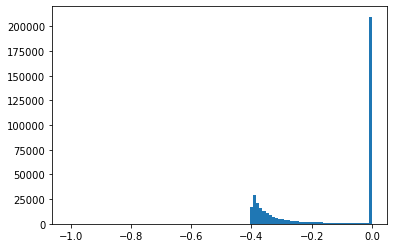

In [292]:
plt.hist(first_npf_stuff[interesting_variable],bins=100,range=(-1.01,0))

(array([  9156.,  13775.,  12059.,  10464.,   9146.,   8180.,   7421.,
          6620.,   5925.,   5493.,   4871.,   4649.,   4370.,   4046.,
          3755.,   3337.,   3285.,   2941.,   2825.,   2661.,   2395.,
          2386.,   2130.,   1975.,   1926.,   1807.,   1798.,   1649.,
          1572.,   1428.,   1338.,   1307.,   1248.,   1189.,   1137.,
          1100.,   1052.,    982.,    933.,    948.,    907.,    862.,
           841.,    757.,    759.,    724.,    715.,    691.,    646.,
           659.,    606.,    664.,    566.,    572.,    568.,    573.,
           557.,    561.,    507.,    486.,    507.,    472.,    471.,
           487.,    491.,    454.,    451.,    426.,    418.,    401.,
           387.,    408.,    407.,    406.,    381.,    385.,    380.,
           361.,    362.,    343.,    380.,    378.,    422.,    360.,
           382.,    372.,    370.,    391.,    421.,    373.,    380.,
           391.,    389.,    425.,    385.,    414.,    463.,    412.,
      

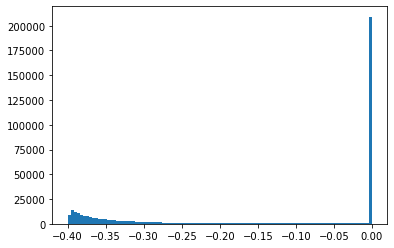

In [293]:
plt.hist(first_npf_stuff[interesting_variable],bins=100,range=(-0.40,0))

(array([     0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,   9156.,  20006.,
         16292.,  13343.,  11404.,   9610.,   8428.,   7192.,   6698.,
          5974.,   5164.,   4812.,   4239.,   3915.,   3527.,   3140.,
          2891.,   2728.,   2526.,   2319.,   2019.,   1958.,   1786.,
          1699.,   1590.,   1455.,   1408.,   1329.,   1281.,   1150.,
          1090.,   1059.,    993.,    971.,    958.,    878.,    828.,
           850.,    841.,    746.,    754.,    701.,    729.,    727.,
           669.,    618.,    627.,    592.,    610.,    599.,    573.,
           575.,    528.,    561.,    540.,    602.,    562.,    555.,
           578.,    601.,    573.,    581.,    624.,    590.,    672.,
      

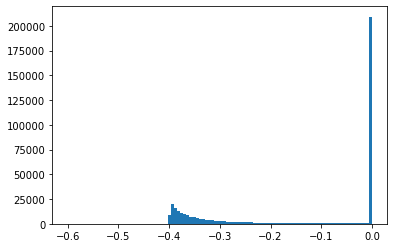

In [294]:
plt.hist(first_npf_stuff[interesting_variable],bins=100,range=(-0.60,0))

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-1.01  , -1.0098, -1.0096, -1.0094, -1.0092, -1.009 , -1.0088,
        -1.0086, -1.0084, -1.0082, -1.008 , -1.0078, -1.0076, -1.0074,
        -1.0072, -1.007 , -1.0068, -1.0066, -1.0064, -1.0062, -1.006 ,
        -1.0058, -1.0056, -1.0054, -1.0052, -1.005 , -1.0048, -1.0046,
        -1.0044, -1.0042, -1.004 , -1.0038, -1.0036, -1.0034, -1.0032,
        -1.003 , -1.0028, -1.0026, -1.0024, -1.0022, -1.002 , -1.0018,
        -1.0016, -1.0014, -1.0012, -1.001 , -1.0008, -1.0006, -1.0004,
        -1.0002, -1.    , -0.9998, -0.9996, -0.9994, 

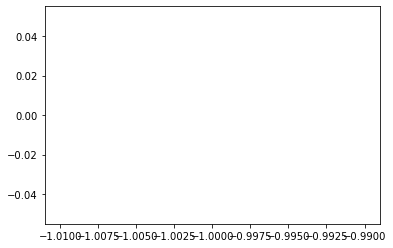

In [295]:
plt.hist(first_npf_stuff[interesting_variable],bins=100,range=(-1.01,-0.99))

(array([1.70000e+01, 2.20000e+01, 2.10000e+01, 2.30000e+01, 2.40000e+01,
        1.80000e+01, 2.30000e+01, 2.30000e+01, 1.60000e+01, 2.00000e+01,
        2.10000e+01, 2.30000e+01, 1.40000e+01, 2.80000e+01, 2.80000e+01,
        1.70000e+01, 1.80000e+01, 2.60000e+01, 2.50000e+01, 2.10000e+01,
        2.30000e+01, 1.80000e+01, 1.70000e+01, 2.30000e+01, 2.50000e+01,
        2.20000e+01, 1.30000e+01, 2.00000e+01, 2.80000e+01, 2.30000e+01,
        2.90000e+01, 2.20000e+01, 3.20000e+01, 2.60000e+01, 2.10000e+01,
        1.90000e+01, 2.70000e+01, 2.90000e+01, 3.50000e+01, 2.20000e+01,
        2.70000e+01, 3.10000e+01, 3.20000e+01, 1.40000e+01, 2.50000e+01,
        2.30000e+01, 2.40000e+01, 2.30000e+01, 2.40000e+01, 2.40000e+01,
        2.15052e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

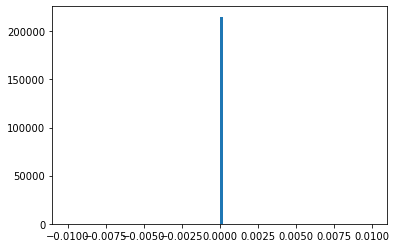

In [296]:
plt.hist(first_npf_stuff[interesting_variable],bins=100,range=(-0.01,0.01))

(array([215052.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
      

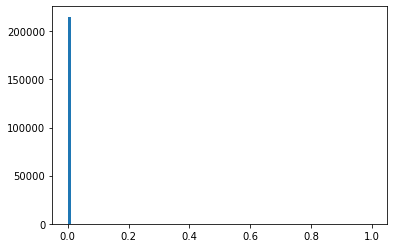

In [297]:
plt.hist(first_npf_stuff[interesting_variable],bins=100,range=(0,1))

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.95 , 0.951, 0.952, 0.953, 0.954, 0.955, 0.956, 0.957, 0.958,
        0.959, 0.96 , 0.961, 0.962, 0.963, 0.964, 0.965, 0.966, 0.967,
        0.968, 0.969, 0.97 , 0.971, 0.972, 0.973, 0.974, 0.975, 0.976,
        0.977, 0.978, 0.979, 0.98 , 0.981, 0.982, 0.983, 0.984, 0.985,
        0.986, 0.987, 0.988, 0.989, 0.99 , 0.991, 0.992, 0.993, 0.994,
        0.995, 0.996, 0.997, 0.998, 0.999, 1.   , 1.001, 1.002, 1.003,
        1.004, 1.005, 1.006, 1.007, 1.008, 1.009, 1.01 , 1.011, 1.012,
        1.013, 1.014, 1.015, 1.016, 1.017, 1.018, 1.0

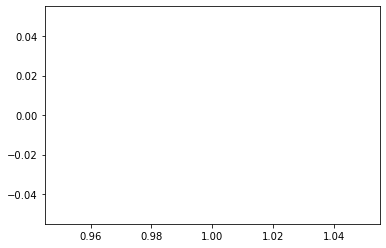

In [298]:
plt.hist(first_npf_stuff[interesting_variable],bins=100,range=(0.95,1.05))

(array([215052.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
      

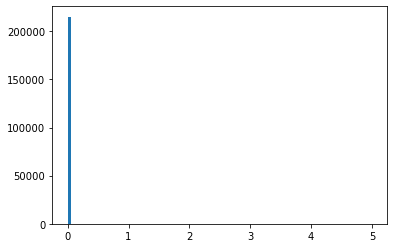

In [299]:
plt.hist(first_npf_stuff[interesting_variable],bins=100,range=(0,5))

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([ 1.00001  ,  1.0900099,  1.1800098,  1.2700098,  1.3600096,
         1.4500095,  1.5400094,  1.6300093,  1.7200092,  1.8100091,
         1.900009 ,  1.990009 ,  2.0800087,  2.1700087,  2.2600086,
         2.3500085,  2.4400084,  2.5300083,  2.6200082,  2.7100081,
         2.800008 ,  2.890008 ,  2.980008 ,  3.0700078,  3.1600077,
         3.2500074,  3.3400073,  3.4300072,  3.5200071,  3.610007 ,
         3.700007 ,  3.7900069,  3.8800068,  3.9700067,  4.0600066,
         4.1500063,  4.2400064,  4.330006 ,  4.4200063,  4.510006 ,
      

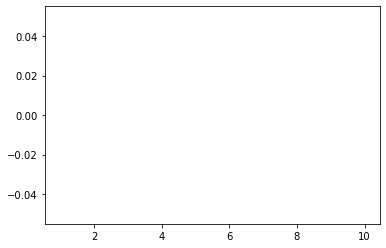

In [300]:
plt.hist(first_npf_stuff[interesting_variable],bins=100,range=(1.00001,10))

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1.0000000e-06, 1.0000989e-02, 2.0000977e-02, 3.0000968e-02,
        4.0000957e-02, 5.0000943e-02, 6.0000934e-02, 7.0000924e-02,
        8.0000915e-02, 9.0000898e-02, 1.0000089e-01, 1.1000088e-01,
        1.2000087e-01, 1.3000086e-01, 1.4000085e-01, 1.5000084e-01,
        1.6000083e-01, 1.7000081e-01, 1.8000080e-01, 1.9000079e-01,
        2.0000078e-01, 2.1000077e-01, 2.2000076e-01, 2.3000075e-01,
        2.4000074e-01, 2.5000072e-01, 2.6000071e-01, 2.7000070e-01,
        2.8000069e-01, 2.9000068e-01, 3.0000067e-01, 3.1000066e-01,
      

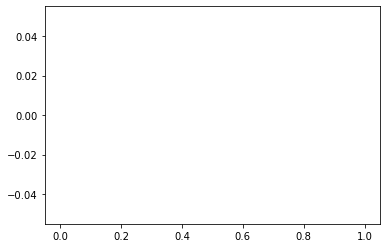

In [301]:
plt.hist(first_npf_stuff[interesting_variable],bins=100,range=(0.000001,0.9999999))

(array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0., 99984., 35800., 17126.,  9930.,
         6867.,  5358.,  4694.,  5188.]),
 array([-5.0000000e+00, -4.9500003e+00, -4.9000001e+00, -4.8500004e+00,
        -4.8000002e+00

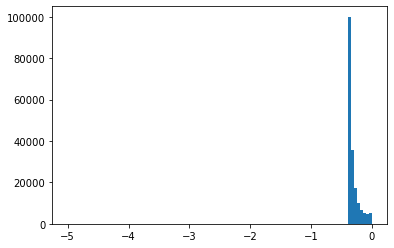

In [302]:
plt.hist(first_npf_stuff[interesting_variable],bins=100,range=(-5,-0.00001))

In [303]:
np.sum(np.array([  2.,   3.,   0.,   1.,   1.,   0.,  16.,  81., 116., 156., 201.,
        231., 238., 269., 268., 271., 301., 341., 347., 394., 381., 375.,
        420., 427., 427., 485., 491., 492., 422., 435., 401., 366., 342.,
        342., 290., 279., 262., 233., 200., 197., 184., 170., 163., 129.,
        132., 113., 105.,  84., 102.,  95.,  80.,  79., 100.,  83.,  61.,
         74.,  69.,  72.,  52.,  63.,  50.,  52.,  45.,  46.,  34.,  34.,
         25.,  18.,  22.,  22.,  17.,  14.,  16.,  10.,   9.,   7.,   1.,
          3.,   5.,   2.,   1.,   2.,   0.,   0.,   2.,   2.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.]))

12953.0

In [304]:
12956

12956

(array([  9209.,  13755.,  12049.,  10467.,   9135.,   8182.,   7422.,
          6622.,   5917.,   5492.,   4874.,   4652.,   4362.,   4044.,
          3754.,   3337.,   3288.,   2939.,   2821.,   2666.,   2391.,
          2385.,   2135.,   1970.,   1926.,   1808.,   1801.,   1647.,
          1569.,   1429.,   1339.,   1305.,   1250.,   1188.,   1139.,
          1101.,   1048.,    980.,    935.,    947.,    909.,    859.,
           844.,    758.,    755.,    724.,    715.,    691.,    647.,
           658.,    607.,    663.,    566.,    573.,    569.,    571.,
           557.,    562.,    506.,    486.,    508.,    471.,    471.,
           487.,    494.,    451.,    451.,    426.,    418.,    402.,
           386.,    408.,    409.,    404.,    381.,    385.,    380.,
           361.,    363.,    342.,    380.,    378.,    422.,    361.,
           381.,    372.,    370.,    391.,    421.,    373.,    380.,
           391.,    389.,    425.,    385.,    414.,    463.,    412.,
      

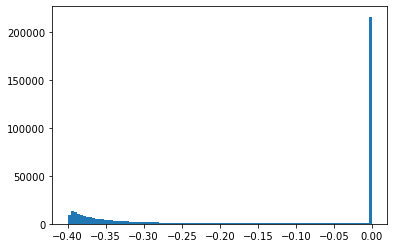

In [305]:
plt.hist(first_npf_stuff[interesting_variable],bins=100)

In [306]:
first_vtx_stuff = ak.to_numpy(df_vtx_clip[:,0])

In [308]:
df_vtx_clip[0,:5]

<Record ... None, None, None, None, None]} type='{"sv_pt": 5 * ?float32, "sv_del...'>

In [310]:
first_vtx_stuff

array([(8.9519917e+15,  8.9519917e+15,  3.7754974e+24,  3.7754974e+24,  1.8037523e+16, 1.889655e+16, 3.7754974e+24, 3.7754974e+24, 3.7754974e+24, 3.7754974e+24, 3.7754974e+24, 3.7754974e+24, 3.7754974e+24, 3.7754974e+24),
       (3.0740284e-41,  3.0740284e-41,  4.5640291e-41,  4.5640291e-41,  3.0740284e-41, 3.074028e-41, 4.5640291e-41, 4.5640291e-41, 4.5640291e-41, 4.5640291e-41, 4.5640291e-41, 4.5640291e-41, 4.5640291e-41, 4.5640291e-41),
       (1.5937823e+01, -1.7083077e-01,  3.8580329e+00, -1.8679965e-01, -3.9871860e-01, 6.000000e+00, 5.6024547e+00, 6.4688057e-01, 2.7153939e-02, 3.2502275e+00, 4.4923130e-02, 3.3954470e+00, 9.9997705e-01, 4.5932850e-01),
       ...,
       (0.0000000e+00,  0.0000000e+00, -3.9648649e-01,  0.0000000e+00,  0.0000000e+00,          nan,           nan,           nan,           nan, 0.0000000e+00,           nan,           nan,           nan,           nan),
       (1.0099298e-40,  3.8125548e-40, -3.6618727e-01,  1.4907504e-39,  2.5223470e-39,          nan,

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-1000.   ,  -999.985,  -999.97 ,  -999.955,  -999.94 ,  -999.925,
         -999.91 ,  -999.895,  -999.88 ,  -999.865,  -999.85 ,  -999.835,
         -999.82 ,  -999.805,  -999.79 ,  -999.775,  -999.76 ,  -999.745,
         -999.73 ,  -999.715,  -999.7  ,  -999.685,  -999.67 ,  -999.655,
         -999.64 ,  -999.625,  -999.61 ,  -999.595,  -999.58 ,  -999.565,
         -999.55 ,  -999.535,  -999.52 ,  -999.505,  -999.49 ,  -999.475,
         -999.46 ,  -999.445,  -999.43 ,  -999.415,  -999.4  ,  -999.385,
         -999.37 ,  -999.355,  -

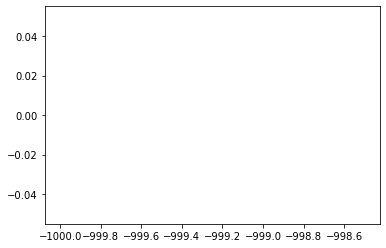

In [635]:
interesting_variable = 'sv_enratio'
#plt.hist(first_cpf_stuff[interesting_variable],bins=100)
plt.hist(first_vtx_stuff[interesting_variable],bins=100,range=(-1000,-998.5))

(array([     0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
      

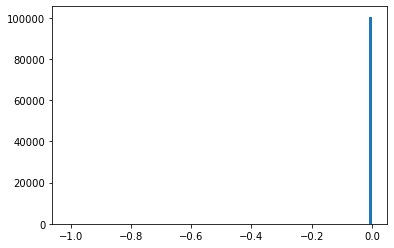

In [636]:
plt.hist(first_vtx_stuff[interesting_variable],bins=100,range=(-1.01,0))

(array([     0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
      

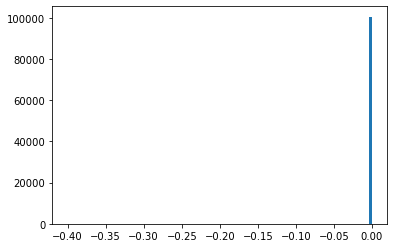

In [612]:
plt.hist(first_vtx_stuff[interesting_variable],bins=100,range=(-0.40,0))

(array([     0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
      

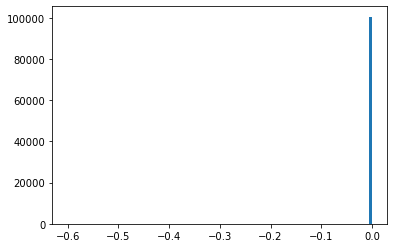

In [613]:
plt.hist(first_vtx_stuff[interesting_variable],bins=100,range=(-0.60,0))

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-1.01  , -1.0098, -1.0096, -1.0094, -1.0092, -1.009 , -1.0088,
        -1.0086, -1.0084, -1.0082, -1.008 , -1.0078, -1.0076, -1.0074,
        -1.0072, -1.007 , -1.0068, -1.0066, -1.0064, -1.0062, -1.006 ,
        -1.0058, -1.0056, -1.0054, -1.0052, -1.005 , -1.0048, -1.0046,
        -1.0044, -1.0042, -1.004 , -1.0038, -1.0036, -1.0034, -1.0032,
        -1.003 , -1.0028, -1.0026, -1.0024, -1.0022, -1.002 , -1.0018,
        -1.0016, -1.0014, -1.0012, -1.001 , -1.0008, -1.0006, -1.0004,
        -1.0002, -1.    , -0.9998, -0.9996, -0.9994, 

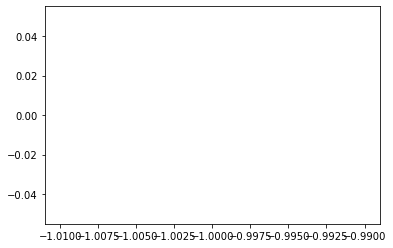

In [614]:
plt.hist(first_vtx_stuff[interesting_variable],bins=100,range=(-1.01,-0.99))

(array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        2.01031e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 3.00000e+00,
        8.00000e+00, 2.20000e+01, 2.70000e+01, 4.80000e+01, 4.30000e+01,
        6.90000e+01, 8.20000e+01, 1.05000e+02, 1.00000e+02, 1.30000e+02,
        1.20000e+02, 1.19000e+02, 1.38000e+02, 1.28

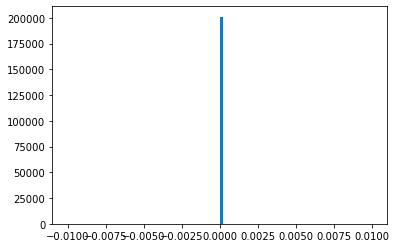

In [615]:
plt.hist(first_vtx_stuff[interesting_variable],bins=100,range=(-0.01,0.01))

(array([2.07493e+05, 8.34200e+03, 7.38200e+03, 6.80500e+03, 6.27100e+03,
        5.78700e+03, 5.71800e+03, 5.37700e+03, 5.08500e+03, 4.91100e+03,
        4.68800e+03, 4.58100e+03, 4.50700e+03, 4.10700e+03, 4.01500e+03,
        4.12900e+03, 3.85800e+03, 3.74800e+03, 3.55600e+03, 3.50300e+03,
        3.30000e+03, 3.19000e+03, 3.13000e+03, 3.07800e+03, 2.83900e+03,
        2.79100e+03, 2.69200e+03, 2.59200e+03, 2.47700e+03, 2.34500e+03,
        2.34000e+03, 2.22800e+03, 2.19800e+03, 2.09300e+03, 2.00500e+03,
        1.87400e+03, 1.82300e+03, 1.80600e+03, 1.66600e+03, 1.63500e+03,
        1.66800e+03, 1.51100e+03, 1.42300e+03, 1.38800e+03, 1.36300e+03,
        1.24900e+03, 1.20600e+03, 1.20400e+03, 1.08900e+03, 1.04400e+03,
        1.00500e+03, 9.17000e+02, 8.74000e+02, 9.06000e+02, 8.13000e+02,
        8.12000e+02, 8.11000e+02, 7.84000e+02, 6.84000e+02, 6.19000e+02,
        5.97000e+02, 5.38000e+02, 5.09000e+02, 4.86000e+02, 4.68000e+02,
        4.45000e+02, 4.30000e+02, 3.73000e+02, 3.88

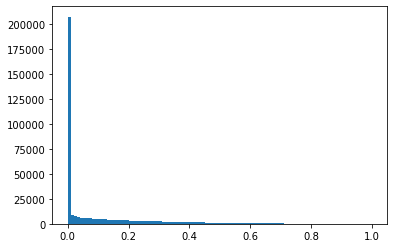

In [616]:
plt.hist(first_vtx_stuff[interesting_variable],bins=100,range=(0,1))

(array([3., 3., 2., 3., 3., 4., 4., 3., 2., 2., 3., 1., 7., 3., 3., 4., 1.,
        3., 1., 2., 3., 0., 3., 0., 2., 0., 2., 4., 5., 3., 2., 1., 3., 1.,
        3., 4., 2., 2., 3., 6., 1., 2., 2., 6., 2., 5., 1., 4., 1., 7., 5.,
        2., 4., 2., 2., 1., 3., 0., 0., 2., 2., 0., 0., 3., 3., 2., 1., 2.,
        2., 1., 2., 1., 1., 0., 2., 1., 0., 2., 1., 0., 1., 2., 2., 1., 2.,
        1., 3., 0., 2., 2., 1., 3., 1., 2., 0., 1., 0., 0., 3., 1.]),
 array([0.95 , 0.951, 0.952, 0.953, 0.954, 0.955, 0.956, 0.957, 0.958,
        0.959, 0.96 , 0.961, 0.962, 0.963, 0.964, 0.965, 0.966, 0.967,
        0.968, 0.969, 0.97 , 0.971, 0.972, 0.973, 0.974, 0.975, 0.976,
        0.977, 0.978, 0.979, 0.98 , 0.981, 0.982, 0.983, 0.984, 0.985,
        0.986, 0.987, 0.988, 0.989, 0.99 , 0.991, 0.992, 0.993, 0.994,
        0.995, 0.996, 0.997, 0.998, 0.999, 1.   , 1.001, 1.002, 1.003,
        1.004, 1.005, 1.006, 1.007, 1.008, 1.009, 1.01 , 1.011, 1.012,
        1.013, 1.014, 1.015, 1.016, 1.017, 1.018, 1.0

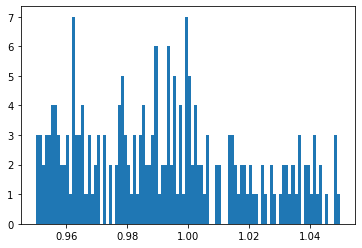

In [617]:
plt.hist(first_vtx_stuff[interesting_variable],bins=100,range=(0.95,1.05))

(array([2.36293e+05, 2.68780e+04, 2.18980e+04, 1.87940e+04, 1.55370e+04,
        1.28970e+04, 1.08640e+04, 8.80400e+03, 7.35300e+03, 5.79200e+03,
        4.51500e+03, 3.71000e+03, 2.59800e+03, 1.99700e+03, 1.36900e+03,
        9.99000e+02, 6.12000e+02, 4.24000e+02, 2.54000e+02, 1.37000e+02,
        7.50000e+01, 5.60000e+01, 4.80000e+01, 4.40000e+01, 4.10000e+01,
        3.50000e+01, 3.20000e+01, 2.10000e+01, 2.10000e+01, 2.50000e+01,
        8.00000e+00, 6.00000e+00, 1.70000e+01, 1.40000e+01, 1.20000e+01,
        9.00000e+00, 8.00000e+00, 1.10000e+01, 1.10000e+01, 8.00000e+00,
        3.00000e+00, 6.00000e+00, 9.00000e+00, 7.00000e+00, 1.00000e+01,
        3.00000e+00, 7.00000e+00, 3.00000e+00, 3.00000e+00, 6.00000e+00,
        4.00000e+00, 6.00000e+00, 4.00000e+00, 6.00000e+00, 4.00000e+00,
        3.00000e+00, 2.00000e+00, 3.00000e+00, 5.00000e+00, 6.00000e+00,
        0.00000e+00, 4.00000e+00, 2.00000e+00, 2.00000e+00, 0.00000e+00,
        4.00000e+00, 5.00000e+00, 0.00000e+00, 3.00

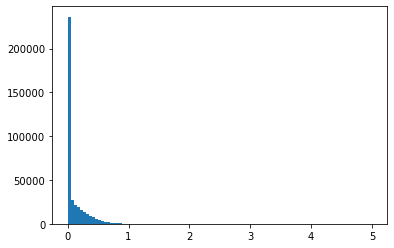

In [618]:
plt.hist(first_vtx_stuff[interesting_variable],bins=100,range=(0,5))

(array([121.,  80.,  78.,  55.,  39.,  30.,  18.,  26.,  19.,  17.,  18.,
          8.,  16.,  12.,  10.,   6.,   9.,   7.,  11.,   6.,   4.,   9.,
          7.,   2.,   2.,   8.,   3.,   4.,   3.,   6.,   3.,   2.,   0.,
          0.,   4.,   2.,   2.,   0.,   2.,   1.,   0.,   0.,   2.,   1.,
          3.,   1.,   0.,   1.,   0.,   1.,   0.,   3.,   1.,   2.,   0.,
          0.,   0.,   1.,   1.,   0.,   0.,   1.,   0.,   1.,   0.,   1.,
          0.,   1.,   1.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,
          0.]),
 array([ 1.00001  ,  1.0900099,  1.1800098,  1.2700098,  1.3600096,
         1.4500095,  1.5400094,  1.6300093,  1.7200092,  1.8100091,
         1.900009 ,  1.990009 ,  2.0800087,  2.1700087,  2.2600086,
         2.3500085,  2.4400084,  2.5300083,  2.6200082,  2.7100081,
         2.800008 ,  2.890008 ,  2.980008 ,  3

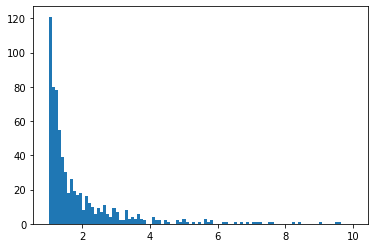

In [619]:
plt.hist(first_vtx_stuff[interesting_variable],bins=100,range=(1.00001,10))

(array([11.,  9.,  6.,  7.,  1.,  1.,  1.,  3.,  0.,  0.,  1.,  1.,  3.,
         1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 1.00001  ,  1.0900099,  1.1800098,  1.2700098,  1.3600096,
         1.4500095,  1.5400094,  1.6300093,  1.7200092,  1.8100091,
         1.900009 ,  1.990009 ,  2.0800087,  2.1700087,  2.2600086,
         2.3500085,  2.4400084,  2.5300083,  2.6200082,  2.7100081,
         2.800008 ,  2.890008 ,  2.980008 ,  3.0700078,  3.1600077,
         3.2500074,  3.3400073,  3.4300072,  3.5200071,  3.610007 ,
         3.700007 ,  3.790

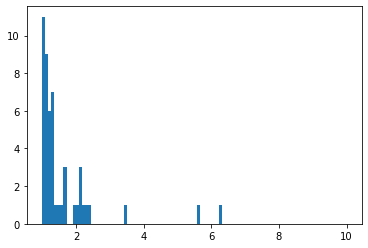

In [620]:
plt.hist(first_vtx_stuff[interesting_variable][hFlav == 4],bins=100,range=(1.00001,10))

(array([501.,  98.,  40.,  14.,  12.,   5.,   5.,   2.,   3.,   1.,   0.,
          0.,   0.,   1.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.]),
 array([  1.00001  ,   1.9900099,   2.9800098,   3.9700098,   4.9600096,
          5.9500093,   6.9400096,   7.9300094,   8.92001  ,   9.910009 ,
         10.900009 ,  11.890009 ,  12.880009 ,  13.870008 ,  14.860008 ,
         15.850009 ,  16.840008 ,  17.830008 ,  18.820007 ,  19.810009 ,
         20.800009 ,  21.7

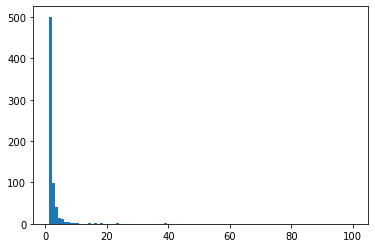

In [621]:
plt.hist(first_vtx_stuff[interesting_variable],bins=100,range=(1.00001,100))

(array([6463., 8343., 7381., 6804., 6271., 5788., 5717., 5380., 5082.,
        4912., 4687., 4581., 4507., 4108., 4014., 4130., 3857., 3748.,
        3556., 3503., 3301., 3189., 3130., 3078., 2839., 2791., 2692.,
        2592., 2477., 2345., 2340., 2228., 2198., 2093., 2005., 1875.,
        1822., 1806., 1666., 1635., 1668., 1511., 1423., 1388., 1363.,
        1249., 1206., 1204., 1090., 1043., 1005.,  917.,  874.,  906.,
         813.,  812.,  811.,  784.,  684.,  619.,  597.,  538.,  509.,
         486.,  468.,  445.,  430.,  373.,  388.,  361.,  332.,  279.,
         258.,  284.,  216.,  257.,  218.,  213.,  156.,  155.,  130.,
         142.,  106.,  122.,  112.,  120.,   81.,   75.,   87.,   61.,
          66.,   54.,   51.,   41.,   42.,   29.,   28.,   22.,   27.,
          30.]),
 array([1.0000000e-06, 1.0000989e-02, 2.0000977e-02, 3.0000968e-02,
        4.0000957e-02, 5.0000943e-02, 6.0000934e-02, 7.0000924e-02,
        8.0000915e-02, 9.0000898e-02, 1.0000089e-01, 1.1000088e-01

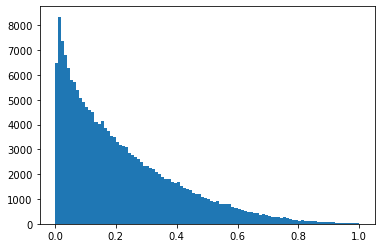

In [622]:
plt.hist(first_vtx_stuff[interesting_variable],bins=100,range=(0.000001,0.9999999))

(array([  3., 148., 487., 638., 852., 864., 866., 837., 861., 907., 867.,
        889., 840., 846., 812., 857., 852., 765., 817., 798., 782., 767.,
        746., 716., 769., 731., 725., 732., 725., 688., 711., 673., 707.,
        709., 681., 660., 664., 715., 656., 628., 669., 638., 585., 641.,
        609., 676., 620., 622., 605., 606., 610., 592., 572., 595., 540.,
        555., 616., 566., 572., 569., 571., 576., 578., 588., 588., 570.,
        607., 565., 542., 533., 583., 548., 542., 580., 520., 531., 546.,
        518., 511., 499., 530., 510., 525., 473., 531., 518., 503., 514.,
        494., 486., 522., 501., 488., 494., 506., 462., 495., 481., 487.,
        475.]),
 array([1.000000e-06, 1.000990e-03, 2.000980e-03, 3.000970e-03,
        4.000960e-03, 5.000950e-03, 6.000940e-03, 7.000930e-03,
        8.000920e-03, 9.000910e-03, 1.000090e-02, 1.100089e-02,
        1.200088e-02, 1.300087e-02, 1.400086e-02, 1.500085e-02,
        1.600084e-02, 1.700083e-02, 1.800082e-02, 1.900081e-02

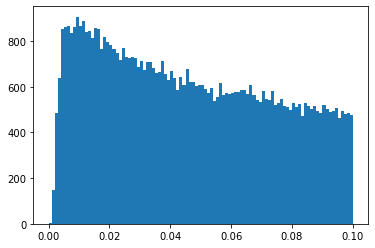

In [623]:
plt.hist(first_vtx_stuff[interesting_variable],bins=100,range=(0.000001,0.1))

(array([ 0.,  1., 15., 21., 35., 38., 30., 30., 43., 37., 37., 54., 41.,
        44., 35., 43., 44., 43., 53., 54., 44., 52., 45., 44., 55., 48.,
        47., 41., 47., 53., 55., 48., 51., 49., 68., 45., 65., 60., 58.,
        55., 53., 60., 58., 50., 51., 62., 71., 61., 55., 50., 61., 49.,
        70., 69., 63., 50., 71., 60., 53., 56., 55., 74., 59., 65., 56.,
        67., 62., 58., 58., 56., 62., 57., 60., 61., 60., 60., 59., 63.,
        56., 56., 81., 57., 55., 62., 70., 61., 68., 62., 61., 72., 72.,
        60., 79., 64., 68., 65., 72., 69., 73., 69.]),
 array([1.000000e-06, 1.000990e-03, 2.000980e-03, 3.000970e-03,
        4.000960e-03, 5.000950e-03, 6.000940e-03, 7.000930e-03,
        8.000920e-03, 9.000910e-03, 1.000090e-02, 1.100089e-02,
        1.200088e-02, 1.300087e-02, 1.400086e-02, 1.500085e-02,
        1.600084e-02, 1.700083e-02, 1.800082e-02, 1.900081e-02,
        2.000080e-02, 2.100079e-02, 2.200078e-02, 2.300077e-02,
        2.400076e-02, 2.500075e-02, 2.600074e-02, 

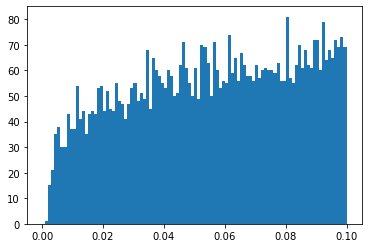

In [624]:
plt.hist(first_vtx_stuff[interesting_variable][hFlav == 5],bins=100,range=(0.000001,0.1))

In [625]:
hFlav = ak.to_numpy(ak.flatten(hflav, axis=0))

In [626]:
hFlav

array([0, 0, 0, ..., 0, 0, 4], dtype=int32)

(array([6463., 8343., 7381., 6804., 6271., 5788., 5717., 5380., 5082.,
        4912., 4687., 4581., 4507., 4108., 4014., 4130., 3857., 3748.,
        3556., 3503., 3301., 3189., 3130., 3078., 2839., 2791., 2692.,
        2592., 2477., 2345., 2340., 2228., 2198., 2093., 2005., 1875.,
        1822., 1806., 1666., 1635., 1668., 1511., 1423., 1388., 1363.,
        1249., 1206., 1204., 1090., 1043., 1005.,  917.,  874.,  906.,
         813.,  812.,  811.,  784.,  684.,  619.,  597.,  538.,  509.,
         486.,  468.,  445.,  430.,  373.,  388.,  361.,  332.,  279.,
         258.,  284.,  216.,  257.,  218.,  213.,  156.,  155.,  130.,
         142.,  106.,  122.,  112.,  120.,   81.,   75.,   87.,   61.,
          66.,   54.,   51.,   41.,   42.,   29.,   28.,   22.,   27.,
          30.]),
 array([1.0000000e-06, 1.0000989e-02, 2.0000977e-02, 3.0000968e-02,
        4.0000957e-02, 5.0000943e-02, 6.0000934e-02, 7.0000924e-02,
        8.0000915e-02, 9.0000898e-02, 1.0000089e-01, 1.1000088e-01

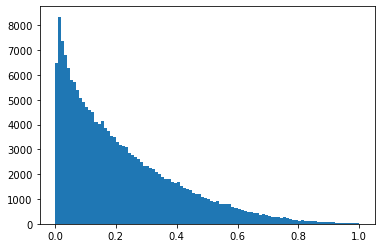

In [627]:
plt.hist(first_vtx_stuff[interesting_variable],bins=100,range=(0.000001,0.9999999))

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-5.0000000e+00, -4.9500003e+00, -4.9000001e+00, -4.8500004e+00,
        -4.8000002e+00, -4.7500005e+00, -4.7000008e+00, -4.6500006e+00,
        -4.6000009e+00, -4.5500007e+00, -4.5000010e+00, -4.4500012e+00,
        -4.4000010e+00, -4.3500013e+00, -4.3000016e+00, -4.2500014e+00,
        -4.2000017e+00, -4.1500015e+00, -4.1000018e+00, -4.0500021e+00,
        -4.0000019e+00, -3.9500022e+00, -3.9000022e+00, -3.8500023e+00,
        -3.8000023e+00, -3.7500024e+00, -3.7000027e+00, -3.6500027e+00,
        -3.6000028e+00, -3.5500028e+00, -3.500

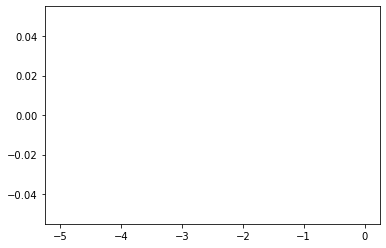

In [628]:
plt.hist(first_vtx_stuff[interesting_variable],bins=100,range=(-5,-0.00001))

In [629]:
np.sum(np.array([  2.,   3.,   0.,   1.,   1.,   0.,  16.,  81., 116., 156., 201.,
        231., 238., 269., 268., 271., 301., 341., 347., 394., 381., 375.,
        420., 427., 427., 485., 491., 492., 422., 435., 401., 366., 342.,
        342., 290., 279., 262., 233., 200., 197., 184., 170., 163., 129.,
        132., 113., 105.,  84., 102.,  95.,  80.,  79., 100.,  83.,  61.,
         74.,  69.,  72.,  52.,  63.,  50.,  52.,  45.,  46.,  34.,  34.,
         25.,  18.,  22.,  22.,  17.,  14.,  16.,  10.,   9.,   7.,   1.,
          3.,   5.,   2.,   1.,   2.,   0.,   0.,   2.,   2.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.]))

12953.0

In [630]:
12956

12956

(array([3.82411e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

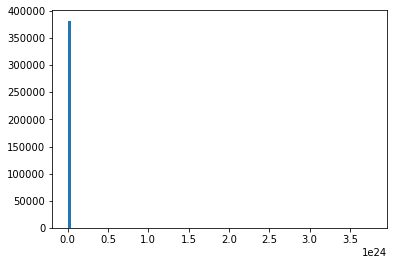

In [631]:
plt.hist(first_vtx_stuff[interesting_variable],bins=100)

In [632]:
df_vtx_clip.type

400000 * {"sv_pt": 5 * ?float32, "sv_deltaR": 5 * ?float32, "sv_mass": 5 * ?float32, "sv_etarel": 5 * ?float32, "sv_phirel": 5 * ?float32, "sv_ntracks": 5 * ?float32, "sv_chi2": 5 * ?float32, "sv_normchi2": 5 * ?float32, "sv_dxy": 5 * ?float32, "sv_dxysig": 5 * ?float32, "sv_d3d": 5 * ?float32, "sv_d3dsig": 5 * ?float32, "sv_costhetasvpv": 5 * ?float32, "sv_enratio": 5 * ?float32}

In [30]:
df_vtx_pts_clip.type

400000 * {"sv_pt": 5 * ?float32, "sv_eta": 5 * ?float32, "sv_phi": 5 * ?float32, "sv_e": 5 * ?float32}

In [1005]:
def quantile_min_max(feature,group='glob',candidate=None):
    if group=='glob':
        print(feature,group,candidate)
        array_np = ak.to_numpy(df_glob[feature])
        array_np = np.where(array_np == -999, 0, array_np)
        array_np = np.where(array_np ==   -1, 0, array_np)
        mini, maxi = np.quantile(array_np,0.01),np.quantile(array_np,0.99)
        mini_, maxi_ = np.quantile(array_np,0.2),np.quantile(array_np,0.8)
        return [mini, maxi], np.std(array_np[(array_np >= mini_) & (array_np <= maxi_)])
    elif group=='cpf':
        print(feature,group,candidate)
        array_np = ak.to_numpy(df_cpf_clip[feature][:,candidate])
        array_np = np.where(array_np == -999, 0, array_np)
        array_np = np.where(array_np ==   -1, 0, array_np)
        mini, maxi = np.quantile(array_np,0.01),np.quantile(array_np,0.99)
        mini_, maxi_ = np.quantile(array_np,0.2),np.quantile(array_np,0.8)
        return [mini, maxi], np.std(array_np[(array_np >= mini_) & (array_np <= maxi_)])
    elif group=='npf':
        print(feature,group,candidate)
        array_np = ak.to_numpy(df_npf_clip[feature][:,candidate])
        array_np = np.where(array_np == -999, 0, array_np)
        array_np = np.where(array_np ==   -1, 0, array_np)
        mini, maxi = np.quantile(array_np,0.01),np.quantile(array_np,0.99)
        mini_, maxi_ = np.quantile(array_np,0.2),np.quantile(array_np,0.8)
        return [mini, maxi], np.std(array_np[(array_np >= mini_) & (array_np <= maxi_)])
    elif group=='vtx':
        print(feature,group,candidate)
        array_np = ak.to_numpy(df_vtx_clip[feature][:,candidate])
        array_np = np.where(array_np == -999, 0, array_np)
        array_np = np.where(array_np ==   -1, 0, array_np)
        mini, maxi = np.quantile(array_np,0.01),np.quantile(array_np,0.99)
        mini_, maxi_ = np.quantile(array_np,0.2),np.quantile(array_np,0.8)
        return [mini, maxi], np.std(array_np[(array_np >= mini_) & (array_np <= maxi_)])
    elif group=='cpf_pts':
        print(feature,group,candidate)
        array_np = ak.to_numpy(df_cpf_pts_clip[feature][:,candidate])
        array_np = np.where(array_np == -999, 0, array_np)
        array_np = np.where(array_np ==   -1, 0, array_np)
        mini, maxi = np.quantile(array_np,0.01),np.quantile(array_np,0.99)
        mini_, maxi_ = np.quantile(array_np,0.2),np.quantile(array_np,0.8)
        return [mini, maxi], np.std(array_np[(array_np >= mini_) & (array_np <= maxi_)])
    elif group=='npf_pts':
        print(feature,group,candidate)
        array_np = ak.to_numpy(df_npf_pts_clip[feature][:,candidate])
        array_np = np.where(array_np == -999, 0, array_np)
        array_np = np.where(array_np ==   -1, 0, array_np)
        mini, maxi = np.quantile(array_np,0.01),np.quantile(array_np,0.99)
        mini_, maxi_ = np.quantile(array_np,0.2),np.quantile(array_np,0.8)
        return [mini, maxi], np.std(array_np[(array_np >= mini_) & (array_np <= maxi_)])
    elif group=='vtx_pts':
        print(feature,group,candidate)
        array_np = ak.to_numpy(df_vtx_pts_clip[feature][:,candidate])
        array_np = np.where(array_np == -999, 0, array_np)
        array_np = np.where(array_np ==   -1, 0, array_np)
        mini, maxi = np.quantile(array_np,0.01),np.quantile(array_np,0.99)
        mini_, maxi_ = np.quantile(array_np,0.2),np.quantile(array_np,0.8)
        return [mini, maxi], np.std(array_np[(array_np >= mini_) & (array_np <= maxi_)])

In [1006]:
print(quantile_min_max('jet_pt','glob'))

jet_pt glob None
([15.444969825744629, 1535.685830078128], 69.261475)


In [1007]:
print(quantile_min_max('Cpfcan_BtagPf_trackEtaRel','cpf',1))

Cpfcan_BtagPf_trackEtaRel cpf 1
([0.0, 6.157034592628479], 0.4810523)


In [1008]:
global_epsilons = np.zeros(len(global_branches))

In [1009]:
global_standardized_epsilons = np.zeros(len(global_branches))

In [1010]:
global_ranges = np.zeros((len(global_branches),2))

In [1011]:
for (i,key) in enumerate(global_branches):
    range_inputs, standardized_epsilon = quantile_min_max(key,'glob')
    scale_epsilon = (range_inputs[1] - range_inputs[0])/2
    global_epsilons[i] = scale_epsilon
    global_standardized_epsilons[i] = standardized_epsilon
    global_ranges[i] = range_inputs
    print(range_inputs, scale_epsilon, standardized_epsilon)

jet_pt glob None
[15.444969825744629, 1535.685830078128] 760.1204301261916 69.261475
jet_eta glob None
[-2.391017284393311, 2.3943071389198307] 2.392662211656571 0.62393546
nCpfcand glob None
[1.0, 36.0] 17.5 2.8966672
nNpfcand glob None
[0.0, 20.0] 10.0 2.1228364
nsv glob None
[0.0, 4.0] 2.0 0.48071712
npv glob None
[9.0, 48.0] 19.5 4.1257358
TagVarCSV_trackSumJetEtRatio glob None
[0.0, 0.9856463485956193] 0.49282317429780964 0.10858201
TagVarCSV_trackSumJetDeltaR glob None
[0.0, 2.6554229521751425] 1.3277114760875712 0.015905594
TagVarCSV_vertexCategory glob None
[0.0, 2.0] 1.0 0.92754763
TagVarCSV_trackSip2dValAboveCharm glob None
[-0.014902344904839993, 0.036601562052965164] 0.02575195347890258 0.00093595526
TagVarCSV_trackSip2dSigAboveCharm glob None
[-2.80285924911499, 12.758635606765749] 7.780747427940369 0.35713342
TagVarCSV_trackSip3dValAboveCharm glob None
[-0.029931544382125138, 0.06389331802725803] 0.04691243120469159 0.0019247151
TagVarCSV_trackSip3dSigAboveCharm glob None

In [1012]:
global_ranges

array([[ 1.54449698e+01,  1.53568583e+03],
       [-2.39101728e+00,  2.39430714e+00],
       [ 1.00000000e+00,  3.60000000e+01],
       [ 0.00000000e+00,  2.00000000e+01],
       [ 0.00000000e+00,  4.00000000e+00],
       [ 9.00000000e+00,  4.80000000e+01],
       [ 0.00000000e+00,  9.85646349e-01],
       [ 0.00000000e+00,  2.65542295e+00],
       [ 0.00000000e+00,  2.00000000e+00],
       [-1.49023449e-02,  3.66015621e-02],
       [-2.80285925e+00,  1.27586356e+01],
       [-2.99315444e-02,  6.38933180e-02],
       [-5.31543049e+00,  1.89747464e+01],
       [ 0.00000000e+00,  1.70000000e+01],
       [ 0.00000000e+00,  9.00000000e+00]])

In [1013]:
cpf_epsilons = np.zeros((len(cpf_branches),25))

In [1014]:
cpf_standardized_epsilons = np.zeros((len(cpf_branches),25))

In [1015]:
cpf_ranges = np.zeros((len(cpf_branches),25, 2))

In [1016]:
for (i,key) in enumerate(cpf_branches):
    for cand in range(25):
        range_inputs, standardized_epsilon = quantile_min_max(key,'cpf',cand)
        scale_epsilon = (range_inputs[1] - range_inputs[0])/2
        cpf_epsilons[i,cand] = scale_epsilon
        cpf_standardized_epsilons[i,cand] = standardized_epsilon
        cpf_ranges[i,cand] = range_inputs
        print(range_inputs, scale_epsilon, standardized_epsilon)

Cpfcan_BtagPf_trackEtaRel cpf 0
[1.617732959985733, 6.018733162879943] 2.2005001014471053 0.44647524
Cpfcan_BtagPf_trackEtaRel cpf 1
[0.0, 6.157034592628479] 3.0785172963142395 0.4810523
Cpfcan_BtagPf_trackEtaRel cpf 2
[0.0, 6.215461888313294] 3.107730944156647 0.51979274
Cpfcan_BtagPf_trackEtaRel cpf 3
[0.0, 6.238176612854007] 3.1190883064270034 0.57858634
Cpfcan_BtagPf_trackEtaRel cpf 4
[0.0, 6.228550491333008] 3.114275245666504 0.98954326
Cpfcan_BtagPf_trackEtaRel cpf 5
[0.0, 6.211091284751893] 3.1055456423759464 1.3429741
Cpfcan_BtagPf_trackEtaRel cpf 6
[0.0, 6.171953864097597] 3.0859769320487986 1.4590832
Cpfcan_BtagPf_trackEtaRel cpf 7
[0.0, 6.1084881067276] 3.0542440533638 1.3531796
Cpfcan_BtagPf_trackEtaRel cpf 8
[0.0, 6.021909422874452] 3.010954711437226 1.207502
Cpfcan_BtagPf_trackEtaRel cpf 9
[0.0, 5.942981433868408] 2.971490716934204 1.0340873
Cpfcan_BtagPf_trackEtaRel cpf 10
[0.0, 5.858998770713807] 2.9294993853569036 0.8456317
Cpfcan_BtagPf_trackEtaRel cpf 11
[0.0, 5.7460

In [1017]:
npf_epsilons = np.zeros((len(npf_branches),25))

In [1018]:
npf_standardized_epsilons = np.zeros((len(npf_branches),25))

In [1019]:
npf_ranges = np.zeros((len(npf_branches),25, 2))

In [1020]:
for (i,key) in enumerate(npf_branches):
    for cand in range(25):
        range_inputs, standardized_epsilon = quantile_min_max(key,'npf',cand)
        scale_epsilon = (range_inputs[1] - range_inputs[0])/2
        npf_epsilons[i,cand] = scale_epsilon
        npf_standardized_epsilons[i,cand] = standardized_epsilon
        npf_ranges[i,cand] = range_inputs
        print(range_inputs, scale_epsilon, standardized_epsilon)

Npfcan_ptrel npf 0
[-0.996482680439949, 9.519938668977239e-39] 0.4982413402199745 0.068871714
Npfcan_ptrel npf 1
[-0.9978387385606766, 1.200107562796306e-38] 0.4989193692803383 0.038604733
Npfcan_ptrel npf 2
[-0.9984986788034439, 1.1694962328755918e-38] 0.49924933940172195 0.36749423
Npfcan_ptrel npf 3
[-0.9986718302965164, 2.3901500891778286e-39] 0.4993359151482582 0.4431514
Npfcan_ptrel npf 4
[-0.9987648129463196, 2.9946303236943065e-39] 0.4993824064731598 0.48076078
Npfcan_ptrel npf 5
[-0.9988052845001221, 2.989201062859203e-39] 0.49940264225006104 0.45520186
Npfcan_ptrel npf 6
[-0.9988275766372681, 2.974158474169292e-39] 0.49941378831863403 0.3854595
Npfcan_ptrel npf 7
[-0.9988074308633804, 3.439263013060818e-40] 0.4994037154316902 0.27374828
Npfcan_ptrel npf 8
[-0.9987912184000015, 3.2927012066770855e-40] 0.49939560920000076 0.0018437873
Npfcan_ptrel npf 9
[-0.9987550383806229, 2.735643028154041e-40] 0.4993775191903114 0.0
Npfcan_ptrel npf 10
[-0.9986810094118118, 2.73829148225161

In [1021]:
vtx_epsilons = np.zeros((len(vtx_branches),5))

In [1022]:
vtx_standardized_epsilons = np.zeros((len(vtx_branches),5))

In [1023]:
vtx_ranges = np.zeros((len(vtx_branches),5, 2))

In [1024]:
for (i,key) in enumerate(vtx_branches):
    for cand in range(5):
        range_inputs, standardized_epsilon = quantile_min_max(key,'vtx',cand)
        scale_epsilon = (range_inputs[1] - range_inputs[0])/2
        vtx_epsilons[i,cand] = scale_epsilon
        vtx_standardized_epsilons[i,cand] = standardized_epsilon
        vtx_ranges[i,cand] = range_inputs
        print(range_inputs, scale_epsilon, standardized_epsilon)

sv_pt vtx 0
[0.0, 269.95538024902396] 134.97769012451198 5.464629
sv_pt vtx 1
[0.0, 171.34339126586914] 85.67169563293457 0.0
sv_pt vtx 2
[0.0, 91.23880668640176] 45.61940334320088 0.0
sv_pt vtx 3
[0.0, 25.99677312850961] 12.998386564254805 0.0
sv_pt vtx 4
[0.0, 2.780260371258143e-40] 1.3901301856290716e-40 0.0
sv_deltaR vtx 0
[-0.4964105808734894, 3.5949752984165918e-40] 0.2482052904367447 0.18949273
sv_deltaR vtx 1
[-0.4931141746044159, 2.7374647161576632e-40] 0.24655708730220796 0.0
sv_deltaR vtx 2
[-0.48370381295681, 2.743770559247125e-40] 0.241851906478405 0.0
sv_deltaR vtx 3
[-0.43024378061294555, 2.74564829918932e-40] 0.21512189030647277 0.0
sv_deltaR vtx 4
[0.0, 2.746194805590407e-40] 1.3730974027952034e-40 0.0
sv_mass vtx 0
[0.0, 9.333378877639781] 4.6666894388198905 0.36026642
sv_mass vtx 1
[0.0, 7.01324266433717] 3.506621332168585 0.0
sv_mass vtx 2
[0.0, 3.7708258700370823] 1.8854129350185411 0.0
sv_mass vtx 3
[0.0, 1.133283718824394] 0.566641859412197 0.0
sv_mass vtx 4
[0.0

In [1025]:
cpf_pts_epsilons = np.zeros((len(cpf_pts_branches),25))

In [1026]:
cpf_pts_standardized_epsilons = np.zeros((len(cpf_pts_branches),25))

In [1027]:
cpf_pts_ranges = np.zeros((len(cpf_pts_branches),25, 2))

In [1028]:
for (i,key) in enumerate(cpf_pts_branches):
    for cand in range(25):
        range_inputs, standardized_epsilon = quantile_min_max(key,'cpf_pts',cand)
        scale_epsilon = (range_inputs[1] - range_inputs[0])/2
        cpf_pts_epsilons[i,cand] = scale_epsilon
        cpf_pts_standardized_epsilons[i,cand] = standardized_epsilon
        cpf_pts_ranges[i,cand] = range_inputs
        print(range_inputs, scale_epsilon, standardized_epsilon)

Cpfcan_pt cpf_pts 0
[0.95556640625, 73.0625] 36.053466796875 1.2797216
Cpfcan_pt cpf_pts 1
[0.0, 97.87562500000058] 48.93781250000029 1.700616
Cpfcan_pt cpf_pts 2
[0.0, 109.75062500000058] 54.87531250000029 1.8855108
Cpfcan_pt cpf_pts 3
[0.0, 113.75] 56.875 1.8992194
Cpfcan_pt cpf_pts 4
[0.0, 112.375] 56.1875 1.9555215
Cpfcan_pt cpf_pts 5
[0.0, 108.5625] 54.28125 1.9528612
Cpfcan_pt cpf_pts 6
[0.0, 104.125] 52.0625 1.7360486
Cpfcan_pt cpf_pts 7
[0.0, 100.5625] 50.28125 1.4757239
Cpfcan_pt cpf_pts 8
[0.0, 93.9375] 46.96875 1.2109008
Cpfcan_pt cpf_pts 9
[0.0, 87.9375] 43.96875 0.9484038
Cpfcan_pt cpf_pts 10
[0.0, 84.1875] 42.09375 0.6901905
Cpfcan_pt cpf_pts 11
[0.0, 75.6875] 37.84375 0.46634725
Cpfcan_pt cpf_pts 12
[0.0, 70.4375] 35.21875 0.27621102
Cpfcan_pt cpf_pts 13
[0.0, 65.12562500000058] 32.56281250000029 0.09809335
Cpfcan_pt cpf_pts 14
[0.0, 60.84375] 30.421875 0.0
Cpfcan_pt cpf_pts 15
[0.0, 55.68781250000029] 27.843906250000146 0.0
Cpfcan_pt cpf_pts 16
[0.0, 49.0] 24.5 0.0
Cpfc

In [1029]:
npf_pts_epsilons = np.zeros((len(npf_pts_branches),25))

In [1030]:
npf_pts_standardized_epsilons = np.zeros((len(npf_pts_branches),25))

In [1031]:
npf_pts_ranges = np.zeros((len(npf_pts_branches),25, 2))

In [1032]:
for (i,key) in enumerate(npf_pts_branches):
    for cand in range(25):
        range_inputs, standardized_epsilon = quantile_min_max(key,'npf_pts',cand)
        scale_epsilon = (range_inputs[1] - range_inputs[0])/2
        npf_pts_epsilons[i,cand] = scale_epsilon
        npf_pts_standardized_epsilons[i,cand] = standardized_epsilon
        npf_pts_ranges[i,cand] = range_inputs
        print(range_inputs, scale_epsilon, standardized_epsilon)

Npfcan_pt npf_pts 0
[0.0, 627.5] 313.75 8.161665
Npfcan_pt npf_pts 1
[0.0, 346.5] 173.25 2.245633
Npfcan_pt npf_pts 2
[0.0, 116.25] 58.125 1.2366415
Npfcan_pt npf_pts 3
[0.0, 75.625] 37.8125 1.014378
Npfcan_pt npf_pts 4
[0.0, 41.84375] 20.921875 0.7995741
Npfcan_pt npf_pts 5
[0.0, 26.84375] 13.421875 0.6056343
Npfcan_pt npf_pts 6
[0.0, 18.953125] 9.4765625 0.43576518
Npfcan_pt npf_pts 7
[0.0, 15.1796875] 7.58984375 0.2700459
Npfcan_pt npf_pts 8
[0.0, 12.414140625000073] 6.207070312500036 0.011635943
Npfcan_pt npf_pts 9
[0.0, 10.5703125] 5.28515625 0.0
Npfcan_pt npf_pts 10
[0.0, 8.96875] 4.484375 0.0
Npfcan_pt npf_pts 11
[0.0, 7.7578125] 3.87890625 0.0
Npfcan_pt npf_pts 12
[0.0, 6.43359375] 3.216796875 0.0
Npfcan_pt npf_pts 13
[0.0, 5.203125] 2.6015625 0.0
Npfcan_pt npf_pts 14
[0.0, 4.15625] 2.078125 0.0
Npfcan_pt npf_pts 15
[0.0, 3.189453125] 1.5947265625 0.0
Npfcan_pt npf_pts 16
[0.0, 2.42578125] 1.212890625 0.0
Npfcan_pt npf_pts 17
[0.0, 1.7978515625] 0.89892578125 0.0
Npfcan_pt npf_

In [1033]:
vtx_pts_epsilons = np.zeros((len(vtx_pts_branches),5))

In [1034]:
vtx_pts_standardized_epsilons = np.zeros((len(vtx_pts_branches),5))

In [1035]:
vtx_pts_ranges = np.zeros((len(vtx_pts_branches),5, 2))

In [1036]:
for (i,key) in enumerate(vtx_pts_branches):
    for cand in range(5):
        range_inputs, standardized_epsilon = quantile_min_max(key,'vtx_pts',cand)
        scale_epsilon = (range_inputs[1] - range_inputs[0])/2
        vtx_pts_epsilons[i,cand] = scale_epsilon
        vtx_pts_standardized_epsilons[i,cand] = standardized_epsilon
        vtx_pts_ranges[i,cand] = range_inputs
        print(range_inputs, scale_epsilon, standardized_epsilon)

sv_pt vtx_pts 0
[0.0, 269.95538024902396] 134.97769012451198 5.464629
sv_pt vtx_pts 1
[0.0, 171.34339126586914] 85.67169563293457 0.0
sv_pt vtx_pts 2
[0.0, 91.23880668640176] 45.61940334320088 0.0
sv_pt vtx_pts 3
[0.0, 25.99677312850961] 12.998386564254805 0.0
sv_pt vtx_pts 4
[0.0, 2.780260371258143e-40] 1.3901301856290716e-40 0.0
sv_eta vtx_pts 0
[-2.2064412951469423, 2.195994005203248] 2.201217650175095 0.03496349
sv_eta vtx_pts 1
[-1.7422093152999878, 1.7208801341056834] 1.7315447247028355 0.0
sv_eta vtx_pts 2
[-0.8291426700353622, 0.796823211312296] 0.8129829406738291 0.0
sv_eta vtx_pts 3
[0.0, 2.7913026031570227e-40] 1.3956513015785113e-40 0.0
sv_eta vtx_pts 4
[0.0, 2.7630524261162344e-40] 1.3815262130581172e-40 0.0
sv_phi vtx_pts 0
[-3.0113272953033445, 3.006407761573792] 3.008867528438568 0.06330836
sv_phi vtx_pts 1
[-2.6993870472908017, 2.720079970359803] 2.7097335088253023 0.0
sv_phi vtx_pts 2
[-1.8070686149597166, 1.833003576993943] 1.8200360959768298 0.0
sv_phi vtx_pts 3
[0.

In [1037]:
np.save('/eos/user/a/anstein/public/DeepJet/Train_ParT/auxiliary/global_epsilons.npy',global_epsilons)

In [1038]:
np.save('/eos/user/a/anstein/public/DeepJet/Train_ParT/auxiliary/global_standardized_epsilons.npy',global_standardized_epsilons)

In [1039]:
np.save('/eos/user/a/anstein/public/DeepJet/Train_ParT/auxiliary/global_ranges.npy',global_ranges)

In [1040]:
np.save('/eos/user/a/anstein/public/DeepJet/Train_ParT/auxiliary/cpf_epsilons.npy',cpf_epsilons)

In [1041]:
np.save('/eos/user/a/anstein/public/DeepJet/Train_ParT/auxiliary/cpf_standardized_epsilons.npy',cpf_standardized_epsilons)

In [1042]:
np.save('/eos/user/a/anstein/public/DeepJet/Train_ParT/auxiliary/cpf_ranges.npy',cpf_ranges)

In [1043]:
np.save('/eos/user/a/anstein/public/DeepJet/Train_ParT/auxiliary/npf_epsilons.npy',npf_epsilons)

In [1044]:
np.save('/eos/user/a/anstein/public/DeepJet/Train_ParT/auxiliary/npf_standardized_epsilons.npy',npf_standardized_epsilons)

In [1045]:
np.save('/eos/user/a/anstein/public/DeepJet/Train_ParT/auxiliary/npf_ranges.npy',npf_ranges)

In [1046]:
np.save('/eos/user/a/anstein/public/DeepJet/Train_ParT/auxiliary/vtx_epsilons.npy',vtx_epsilons)

In [1047]:
np.save('/eos/user/a/anstein/public/DeepJet/Train_ParT/auxiliary/vtx_standardized_epsilons.npy',vtx_standardized_epsilons)

In [1048]:
np.save('/eos/user/a/anstein/public/DeepJet/Train_ParT/auxiliary/vtx_ranges.npy',vtx_ranges)

In [1049]:
np.save('/eos/user/a/anstein/public/DeepJet/Train_ParT/auxiliary/cpf_pts_epsilons.npy',cpf_pts_epsilons)

In [1050]:
np.save('/eos/user/a/anstein/public/DeepJet/Train_ParT/auxiliary/cpf_pts_standardized_epsilons.npy',cpf_pts_standardized_epsilons)

In [1051]:
np.save('/eos/user/a/anstein/public/DeepJet/Train_ParT/auxiliary/cpf_pts_ranges.npy',cpf_pts_ranges)

In [1052]:
np.save('/eos/user/a/anstein/public/DeepJet/Train_ParT/auxiliary/npf_pts_epsilons.npy',npf_pts_epsilons)

In [1053]:
np.save('/eos/user/a/anstein/public/DeepJet/Train_ParT/auxiliary/npf_pts_standardized_epsilons.npy',npf_pts_standardized_epsilons)

In [1054]:
np.save('/eos/user/a/anstein/public/DeepJet/Train_ParT/auxiliary/npf_pts_ranges.npy',npf_pts_ranges)

In [1055]:
np.save('/eos/user/a/anstein/public/DeepJet/Train_ParT/auxiliary/vtx_pts_epsilons.npy',vtx_pts_epsilons)

In [1056]:
np.save('/eos/user/a/anstein/public/DeepJet/Train_ParT/auxiliary/vtx_pts_standardized_epsilons.npy',vtx_pts_standardized_epsilons)

In [1057]:
np.save('/eos/user/a/anstein/public/DeepJet/Train_ParT/auxiliary/vtx_pts_ranges.npy',vtx_pts_ranges)